# House Prices: Advanced Regression Techniques
### Predict sales prices and practice feature engineering, RFs, and gradient boosting

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

#### Best results: RMSE of X

### Project Plan

In [498]:
# Import all the necessery modules - pandas, numpy, scikit learn etc 
# Import data into notebook by reading it into a DataFrame
# Understand nature and shape of data using .info(), .describe(), .shape, etc - datatyples, shapes, averages, missing values
# Continuous data - Histograms & boxplots
# Categorical data - bar plots & value counts 
# Missing data & imputation 
# Correlation between variables 
# Explore interesting themes 
    # Are bigger houses more expensive? 
    # Better neighborhood = high price? 
    # Do newer builds go for more? 
    # How important a factor is the overall condition - dirt, damage, leaks, things that need to be repaired/replaced? 
# Preprocessing
# Scaling 
# Model baseline 
# Evaluating different models with CV
# Hyperparameter tuning 
# Ensemble of best models 
# Final model & submission 

### Exploratory Data Analysis

In [499]:
# Import necessery libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

sns.set_style('darkgrid')

# Show full numpy array without truncation
import sys
np.set_printoptions(threshold=sys.maxsize)

# Ignore jupyter notebook warnings
import warnings
warnings.filterwarnings('ignore')

# Max DF columns & rows to display
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 10)
pd.reset_option('display.max_columns','display.max_rows') 

In [500]:
# Common regression algorithms
from sklearn.dummy import DummyRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor, VotingRegressor, GradientBoostingRegressor

# Other pre-processing and evaluation tools needed
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.pipeline import make_pipeline

In [501]:
# Import raw data into notebook as DataFrame
raw_kaggle_train = pd.read_csv('data/train.csv')
raw_kaggle_test = pd.read_csv('data/test.csv')

# To explore the data we'll make a copy
df_train = raw_kaggle_train.copy(deep=True)
df_test = raw_kaggle_test.copy(deep=True)

# Passing their reference to a list will make it easy to clean both at the same time
datasets = [df_train, df_test]

In [502]:
# Concatinated df's 
t1 = raw_kaggle_train.copy(deep=True)
t2 = raw_kaggle_test.copy(deep=True)
t2['SalePrice'] = np.nan
df_all = pd.concat([t1,t2], ignore_index=True)
data = [df_train, df_test, df_all]

We have 1460 examples for the training data and 1459 for the test. The training data has 80 independent/explanatory variables and 1 target/dependend variable that we want to predict - sale price of the house. Test leaves this column out - it's for us to predict. Most datatypes are objects & integers with some float columns. 19 and 33 missing columns in train and test columns respectively. 34 columns where either train or test data is mising. Key null columns are: Alley, Fence, FireplaceQU, LotFrontage, MiscFeature and	PoolQC. 

In [503]:
print(f'Train data shape: {df_train.shape}') 
print(f'Test data shape: {df_test.shape}') 

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [504]:
for df in datasets:
    display(df.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64

object     43
int64      26
float64    11
dtype: int64

In [505]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [506]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [507]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [508]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [509]:
display(df_train.head())
display(df_train.sample(5))
display(df_train.tail())

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
915    916         160       RM         21.0     2001   Pave   NaN      Reg   
724    725          20       RL         86.0    13286   Pave   NaN      IR1   
1331  1332          80       RL         55.0    10780   Pave   NaN      IR1   
749    750          50       RL         50.0     8405   Pave   NaN      Reg   
1099  1100          20       RL         82.0    11880   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
915          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
724          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1331         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
749          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1099         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
915       1   2007        WD         Normal      75000  
724       2   2009        WD         Normal     320000  
1331      7   2006        WD         Normal     132500  
749       4   2009        WD         Normal      98000  
1099      4   2009       COD        Abnorml     157000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [510]:
display(df_test.head())

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [511]:
null_train = pd.DataFrame(df_train.isnull().sum()[df_train.isnull().sum() > 0], columns=['train'])
null_test = pd.DataFrame(df_test.isnull().sum()[df_test.isnull().sum() > 0], columns=['test'])
null_df = pd.merge(null_train, null_test, how='outer', left_index=True, right_index=True).fillna(0).astype('int')
null_df.index.name = 'Missing Columns'
display(null_df)

train  test
Missing Columns             
Alley             1369  1352
BsmtCond            37    45
BsmtExposure        38    44
BsmtFinSF1           0     1
BsmtFinSF2           0     1
BsmtFinType1        37    42
BsmtFinType2        38    42
BsmtFullBath         0     2
BsmtHalfBath         0     2
BsmtQual            37    44
BsmtUnfSF            0     1
Electrical           1     0
Exterior1st          0     1
Exterior2nd          0     1
Fence             1179  1169
FireplaceQu        690   730
Functional           0     2
GarageArea           0     1
GarageCars           0     1
GarageCond          81    78
GarageFinish        81    78
GarageQual          81    78
GarageType          81    76
GarageYrBlt         81    78
KitchenQual          0     1
LotFrontage        259   227
MSZoning             0     4
MasVnrArea           8    15
MasVnrType           8    16
MiscFeature       1406  1408
PoolQC            1453  1456
SaleType             0     1
TotalBsmtSF          0     1
Utilities            0     2

In [512]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [513]:
df_test.agg(['count','mean','median','std'])

Id   MSSubClass  MSZoning  LotFrontage      LotArea  Street  \
count   1459.000000  1459.000000    1455.0  1232.000000  1459.000000  1459.0   
mean    2190.000000    57.378341       NaN    68.580357  9819.161069     NaN   
median  2190.000000    50.000000       NaN    67.000000  9399.000000     NaN   
std      421.321334    42.746880       NaN    22.376841  4955.517327     NaN   

        Alley  LotShape  LandContour  Utilities  ...  ScreenPorch  \
count   107.0    1459.0       1459.0     1457.0  ...  1459.000000   
mean      NaN       NaN          NaN        NaN  ...    17.064428   
median    NaN       NaN          NaN        NaN  ...     0.000000   
std       NaN       NaN          NaN        NaN  ...    56.609763   

           PoolArea  PoolQC  Fence  MiscFeature      MiscVal       MoSold  \
count   1459.000000     3.0  290.0         51.0  1459.000000  1459.000000   
mean       1.744345     NaN    NaN          NaN    58.167923     6.104181   
median     0.000000     NaN    NaN          NaN     0.000000     6.000000   
std       30.491646     NaN    NaN          NaN   630.806978     2.722432   

             YrSold  SaleType  SaleCondition  
count   1459.000000    1458.0         1459.0  
mean    2007.769705       NaN            NaN  
median  2008.000000       NaN            NaN  
std        1.301740       NaN            NaN  

[4 rows x 80 columns]

In [514]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

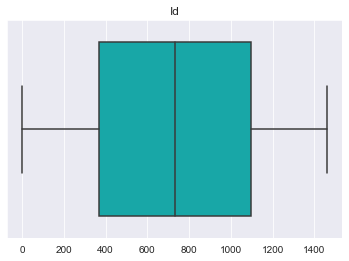

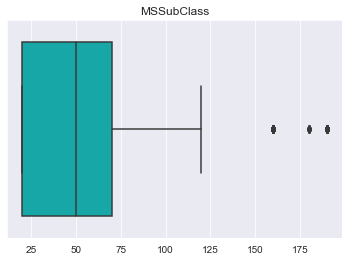

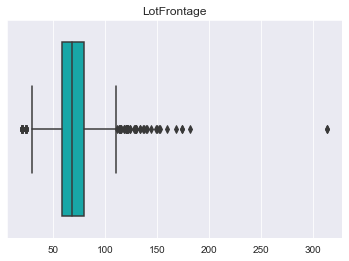

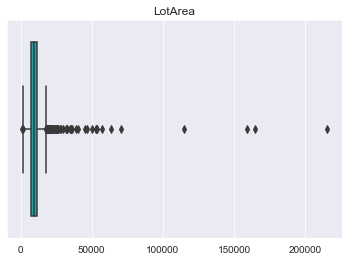

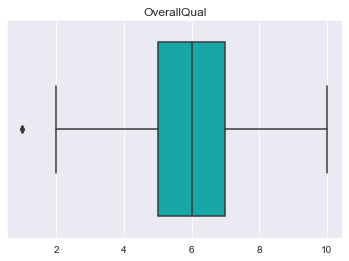

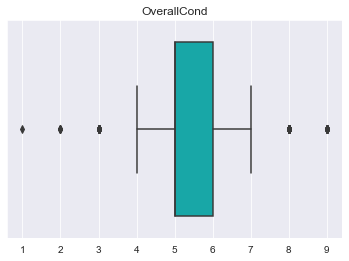

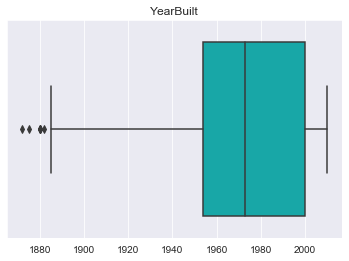

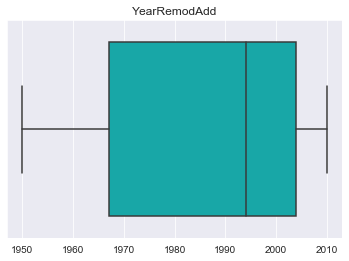

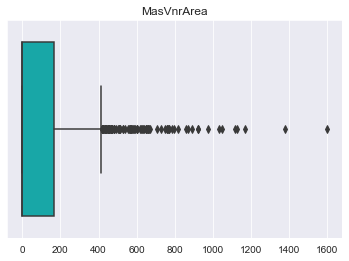

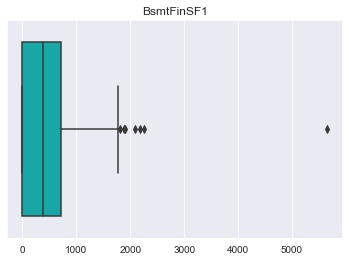

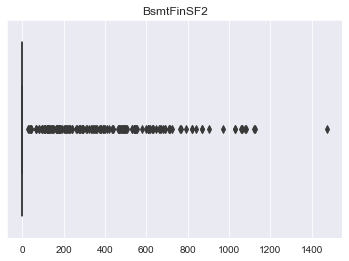

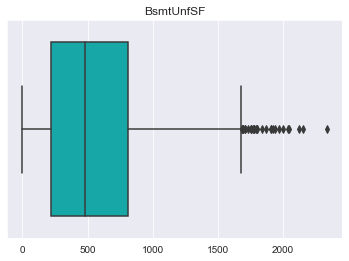

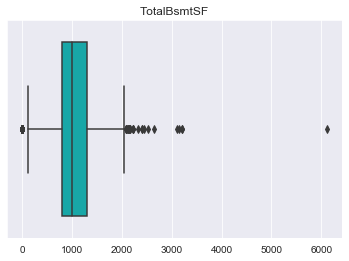

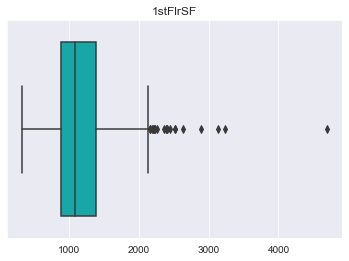

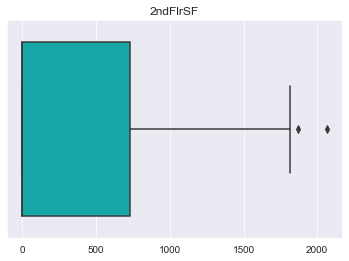

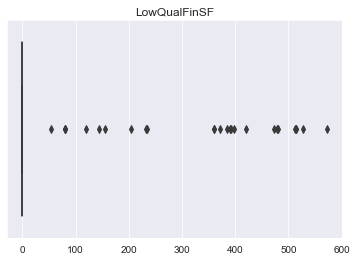

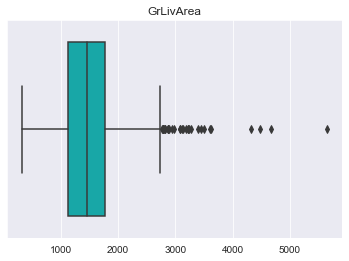

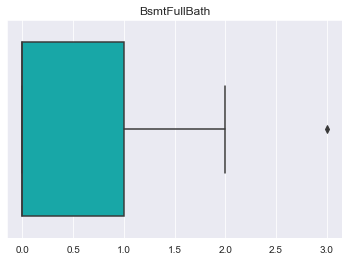

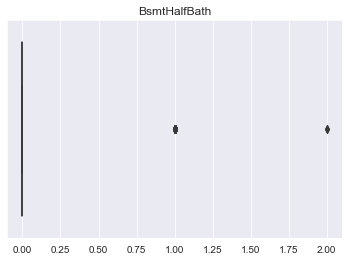

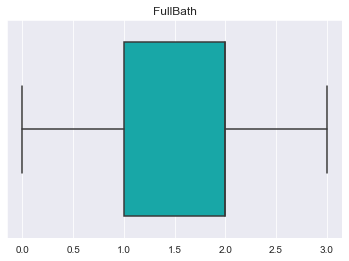

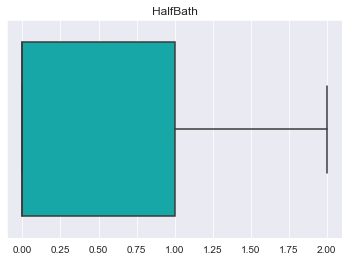

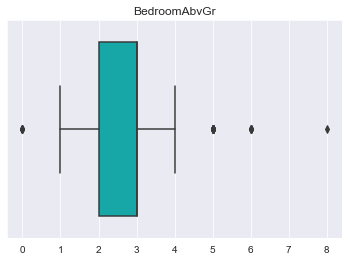

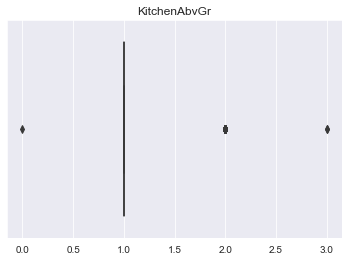

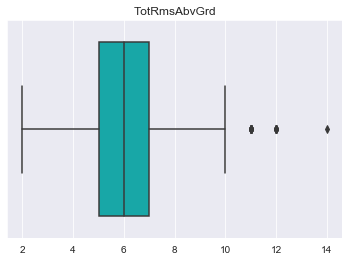

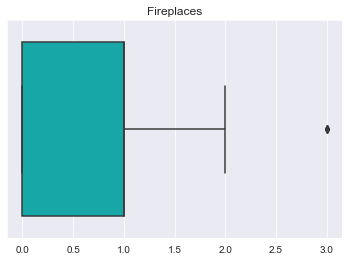

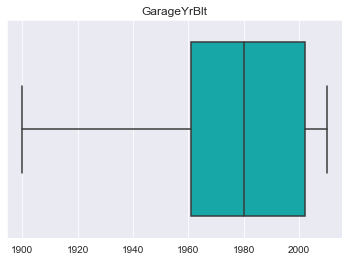

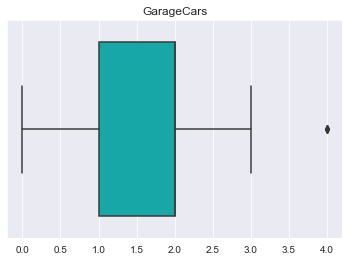

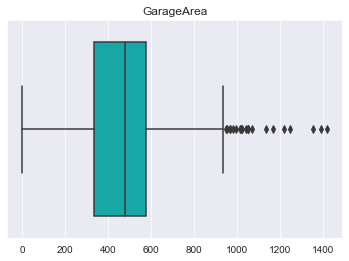

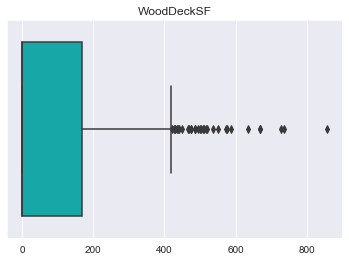

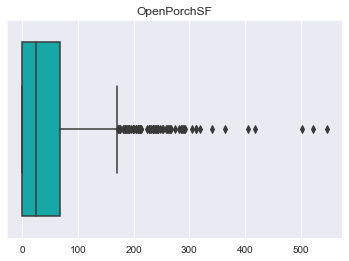

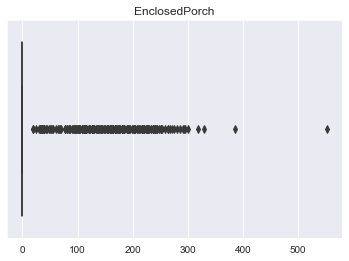

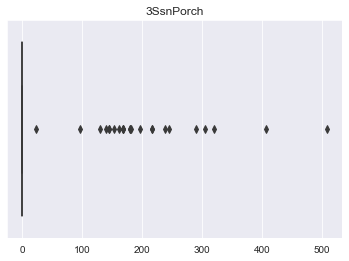

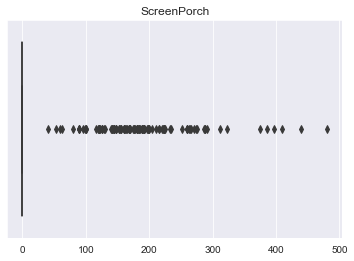

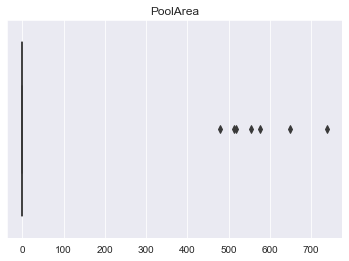

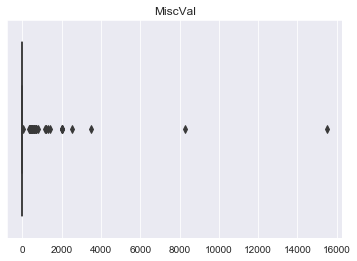

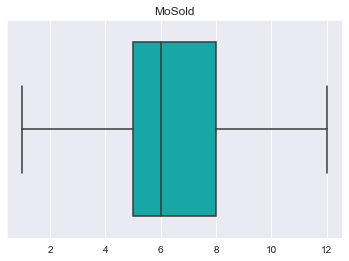

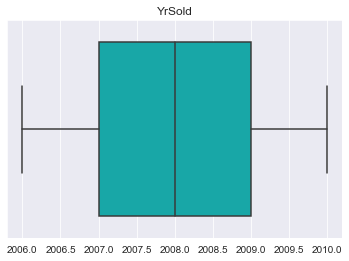

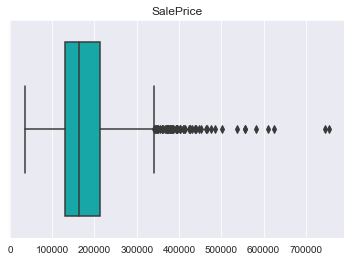

In [515]:
for column in df_train.dtypes[(df_train.dtypes == 'int64') | (df_train.dtypes == 'float')].index:
#   df_train[[column]].boxplot()
    sns.boxplot(df_train[[column]], color='c')
    plt.title(column)
    plt.show()

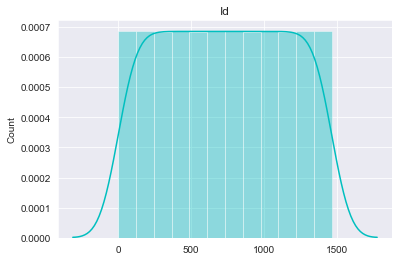

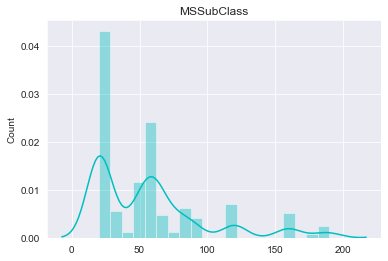

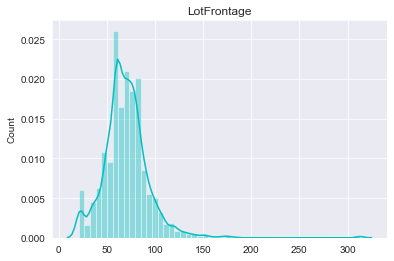

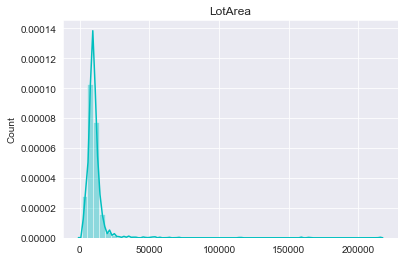

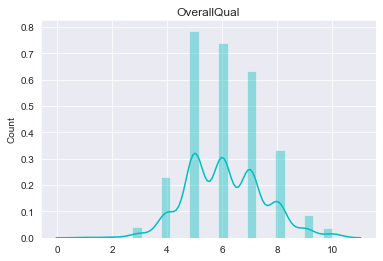

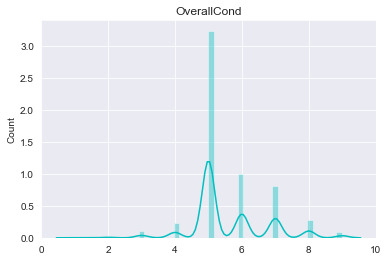

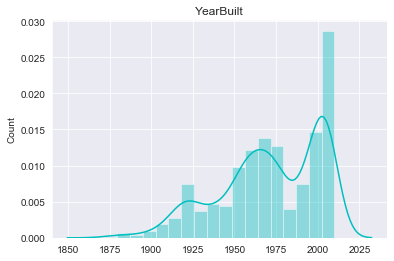

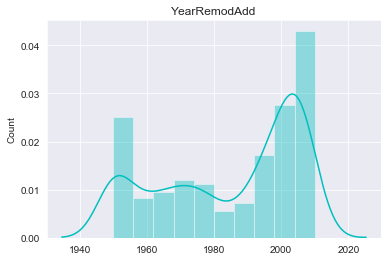

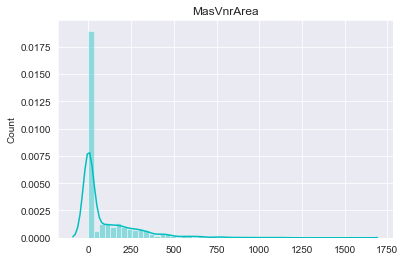

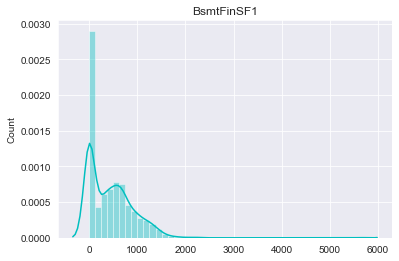

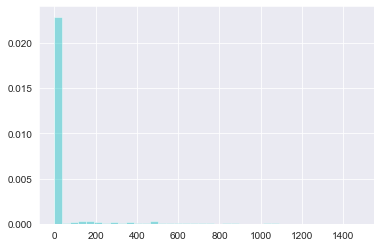

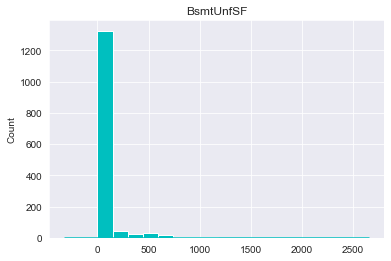

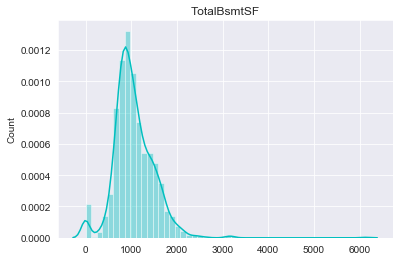

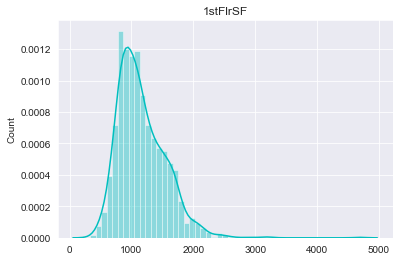

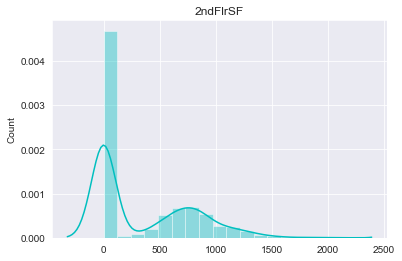

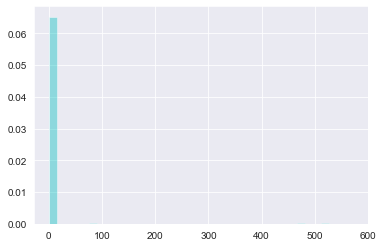

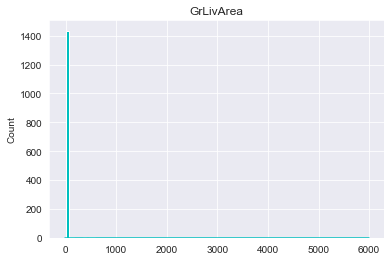

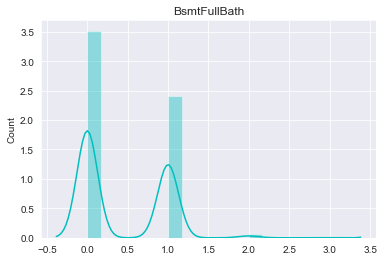

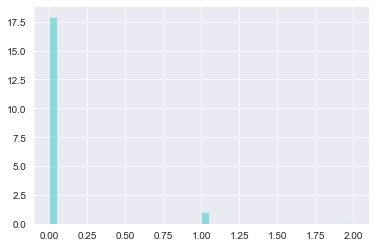

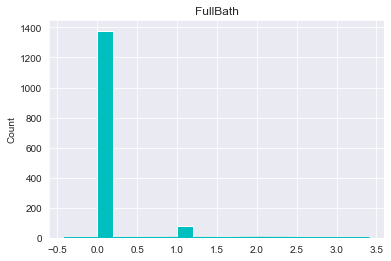

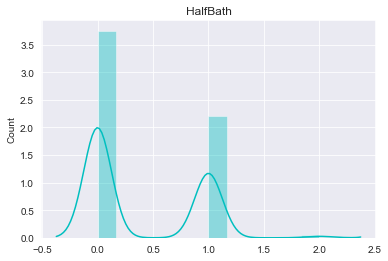

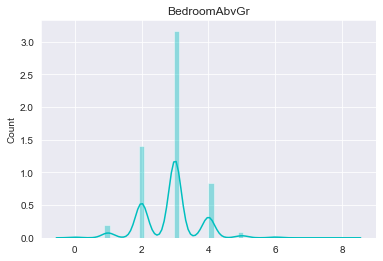

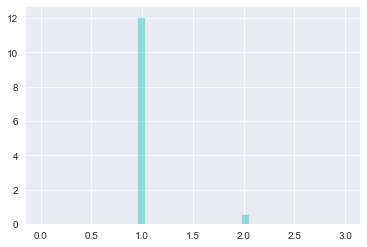

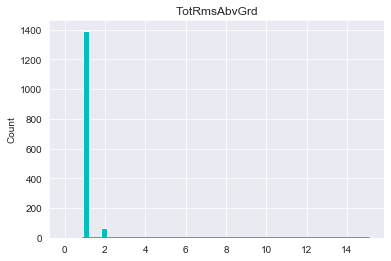

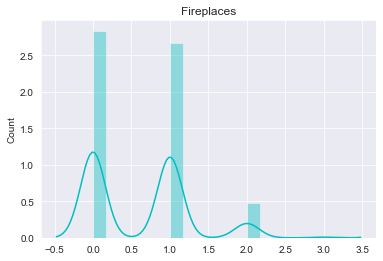

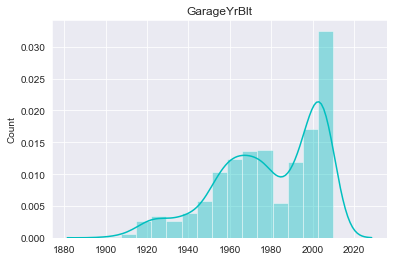

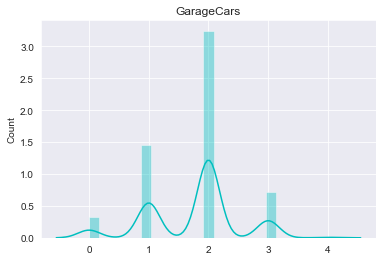

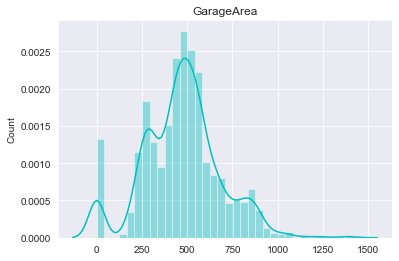

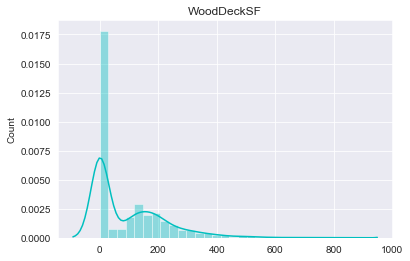

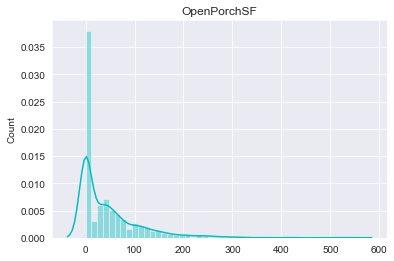

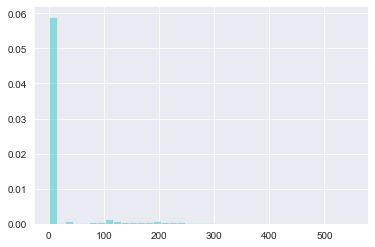

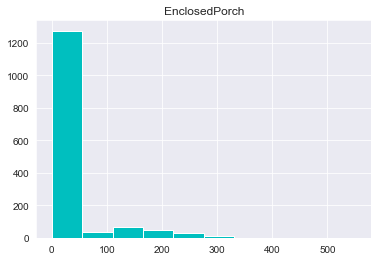

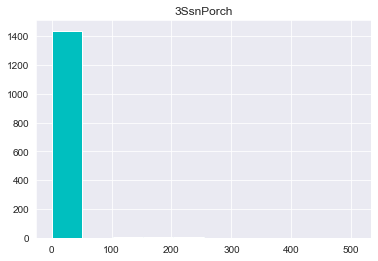

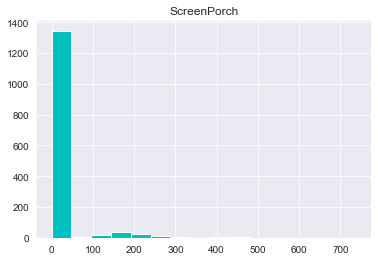

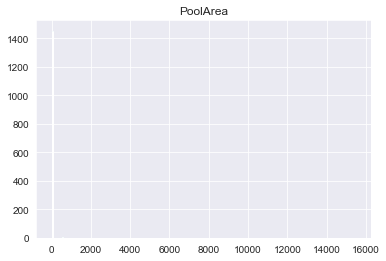

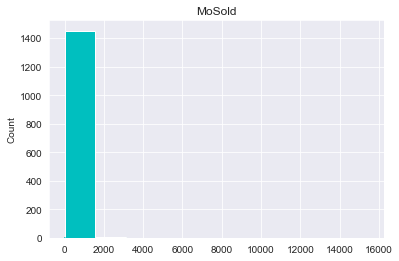

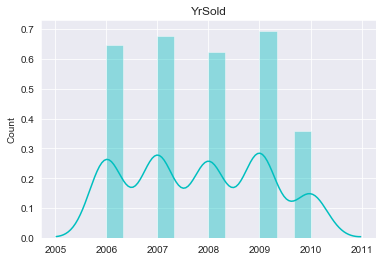

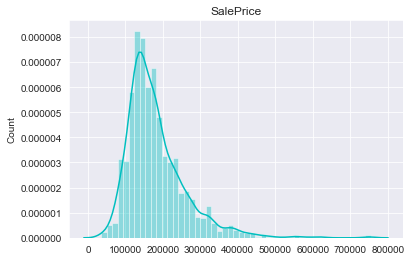

In [516]:
for column in df_train.dtypes[(df_train.dtypes == 'int64') | (df_train.dtypes == 'float')].index:
    #df_train[[column]].hist()
    try:
        sns.distplot(df_train[[column]], color='c')
    except:
        df_train[[column]].hist(color='c')
    else:
        plt.title(column)
        plt.ylabel('Count')
        plt.show()

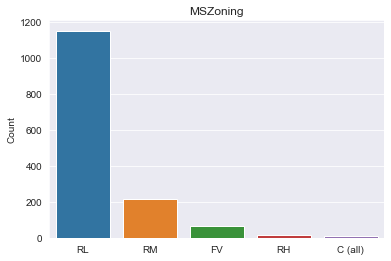

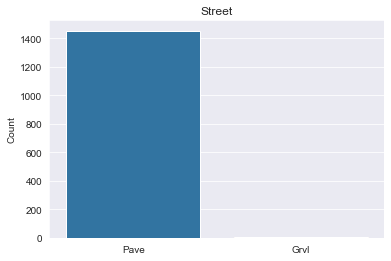

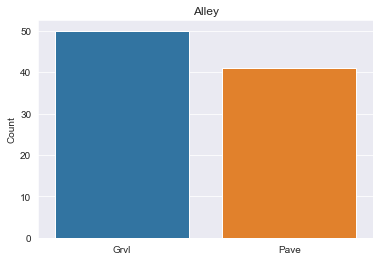

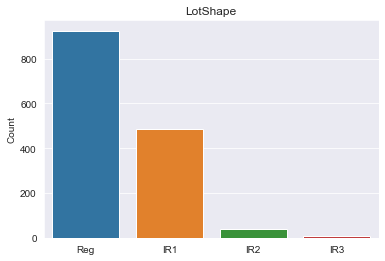

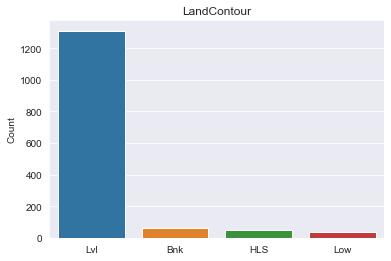

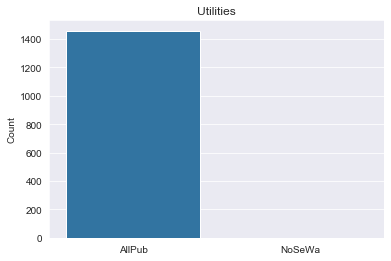

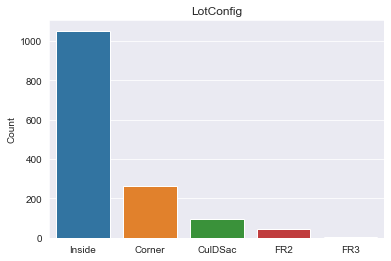

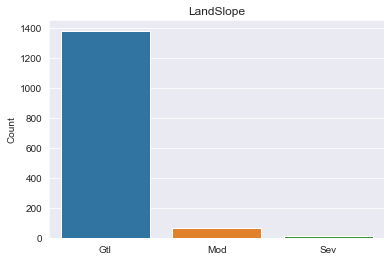

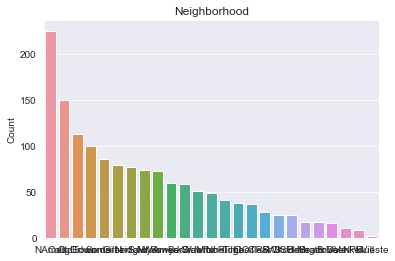

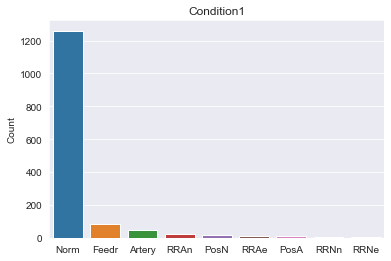

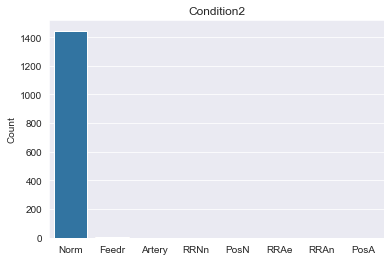

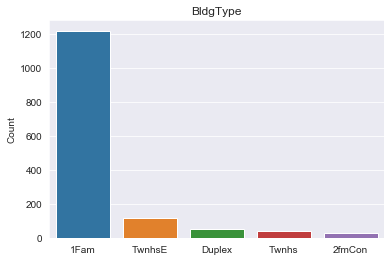

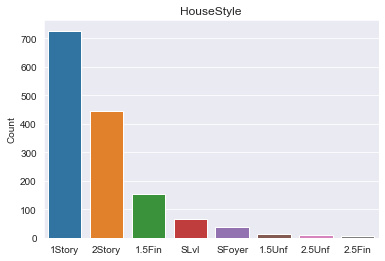

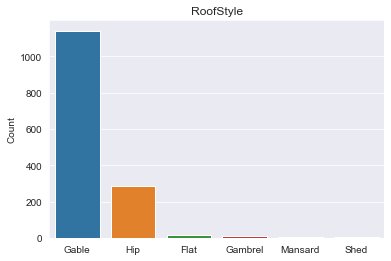

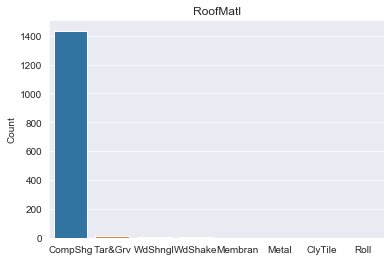

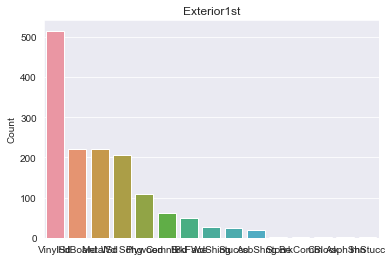

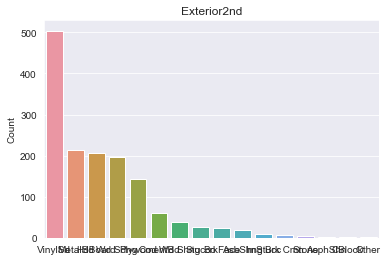

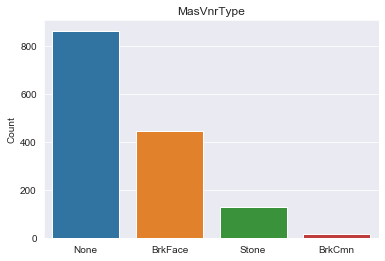

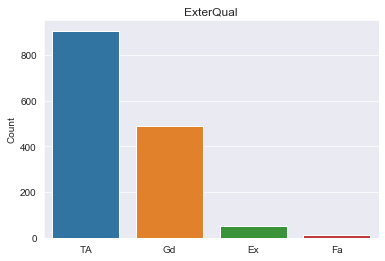

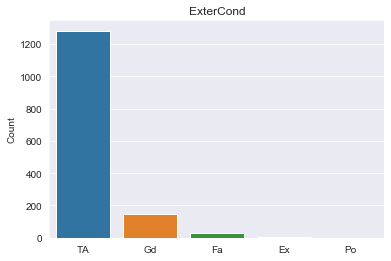

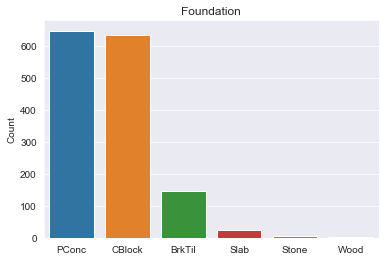

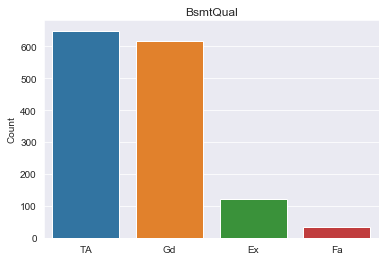

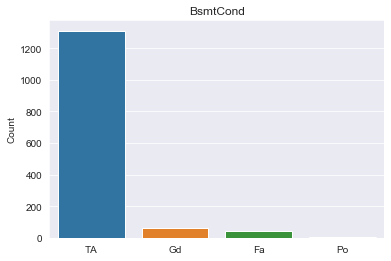

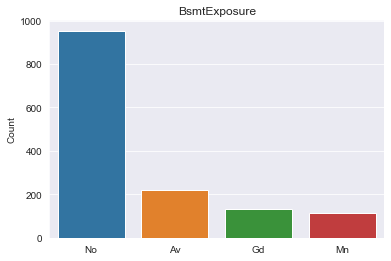

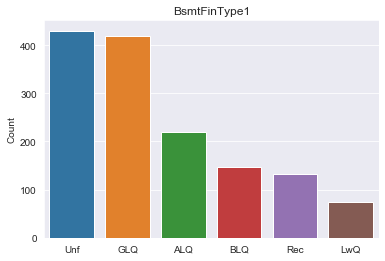

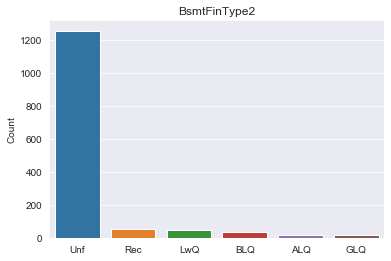

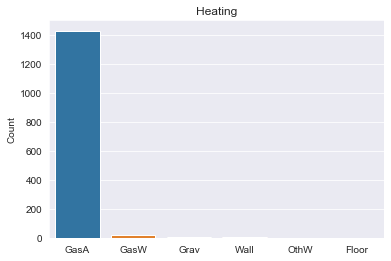

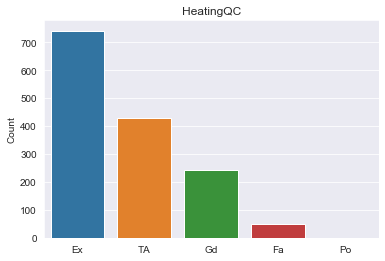

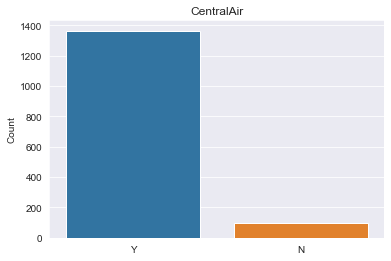

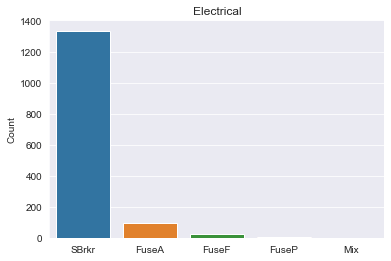

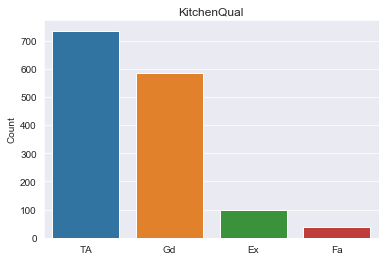

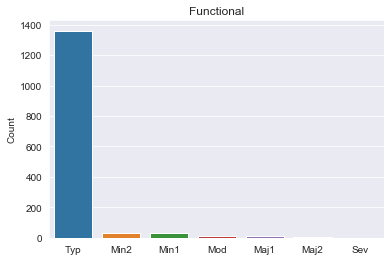

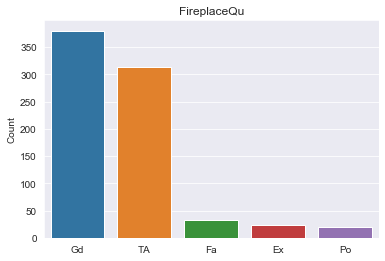

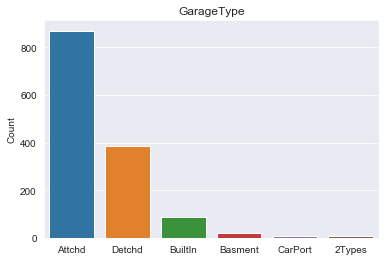

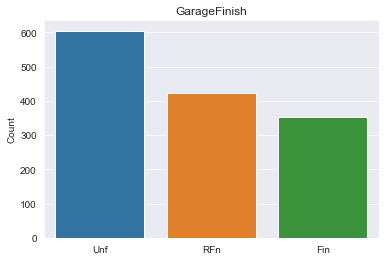

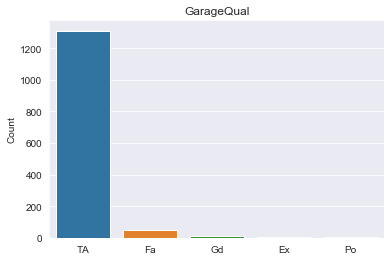

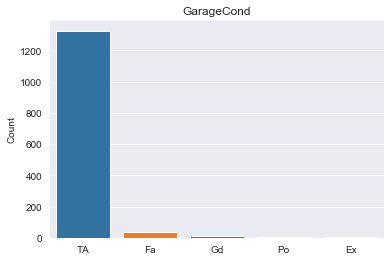

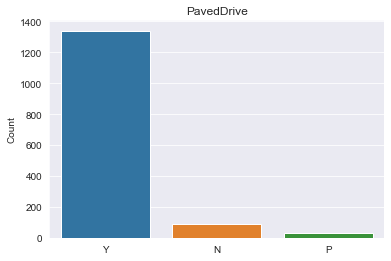

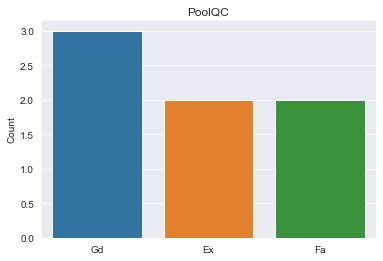

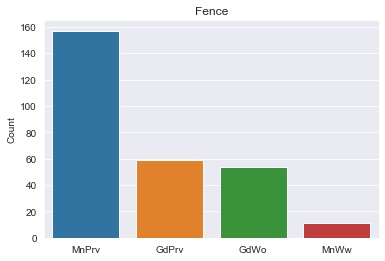

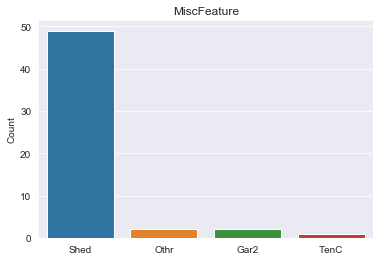

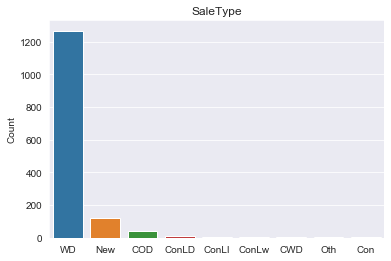

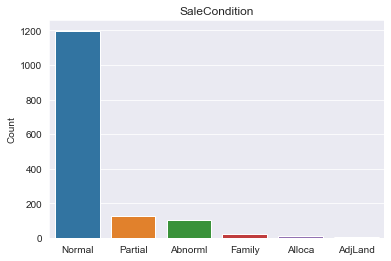

In [517]:
for column in df_train.dtypes[df_train.dtypes == 'object'].index:
    new=pd.DataFrame(df_train[column].value_counts()).transpose()
    sns.barplot(data=new, orient='v')
    plt.title(column)
    plt.ylabel('Count')
    plt.show()

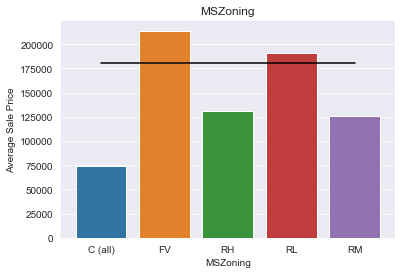

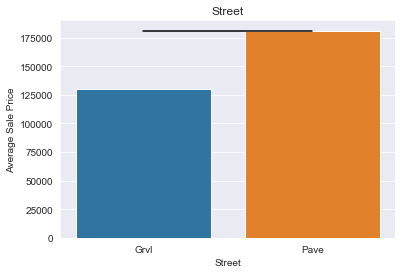

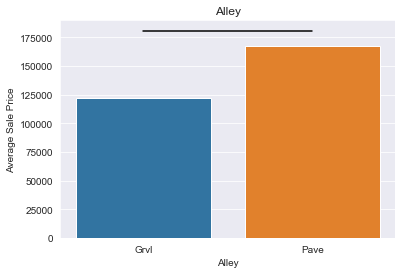

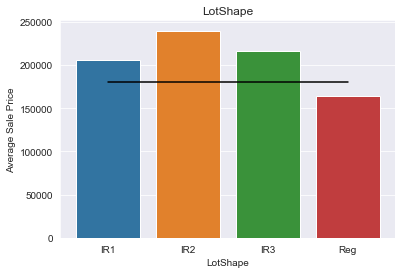

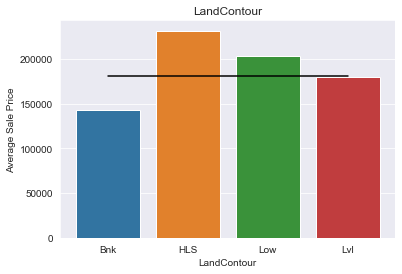

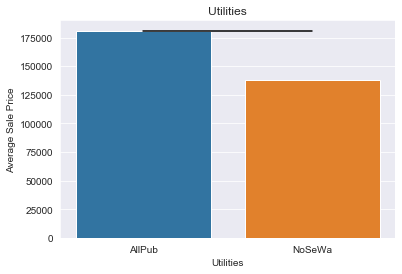

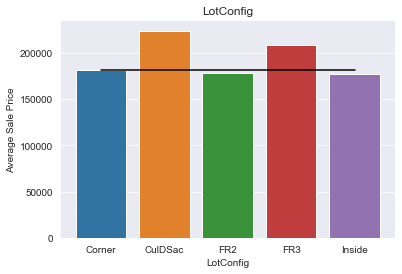

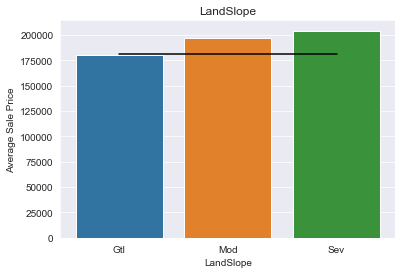

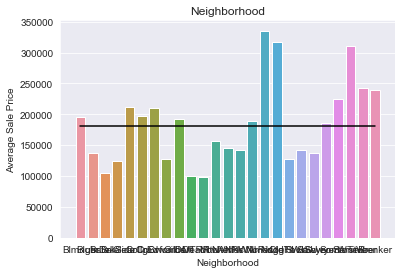

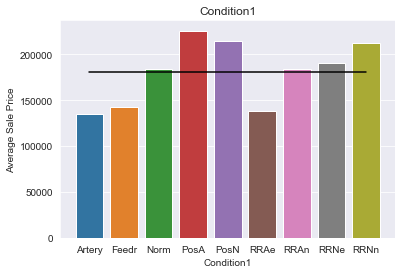

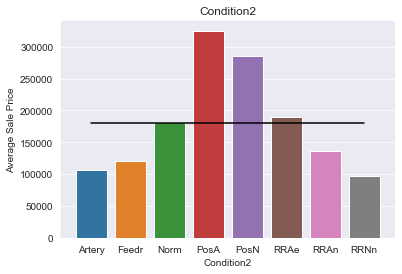

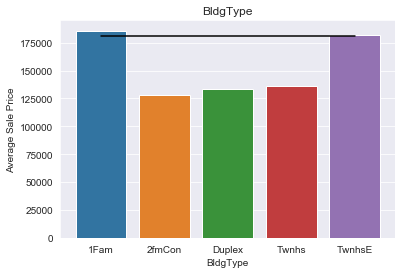

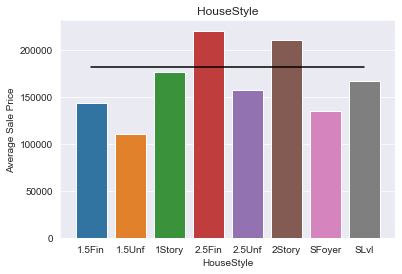

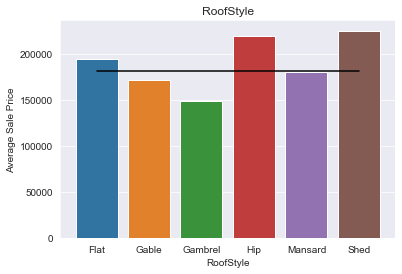

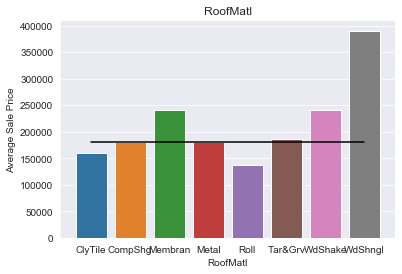

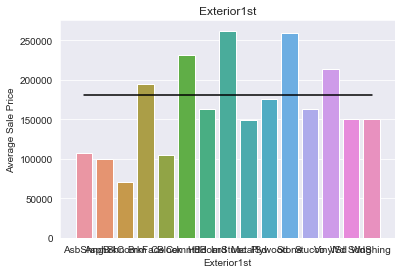

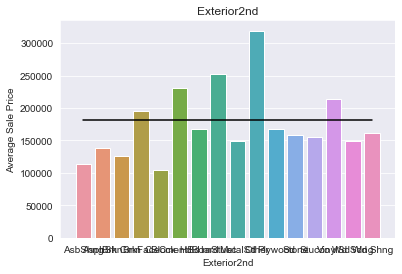

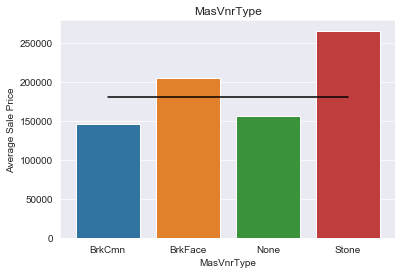

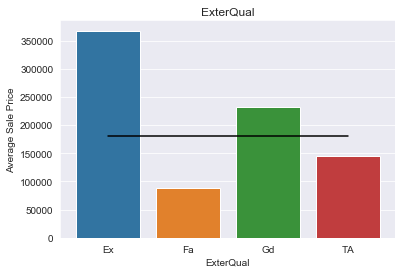

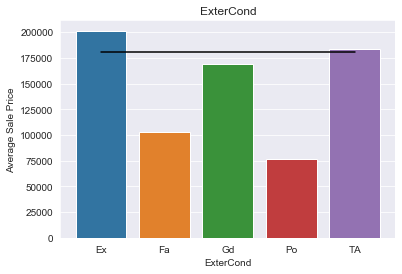

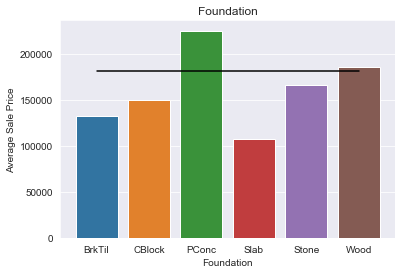

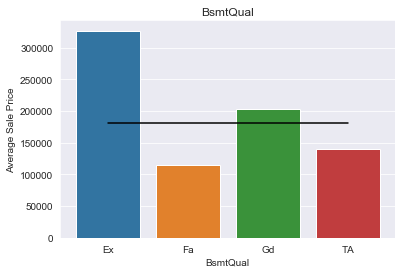

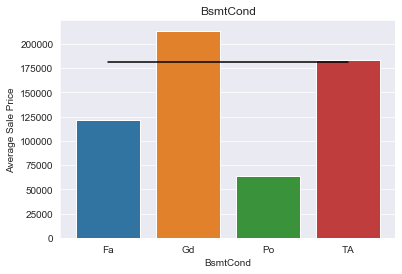

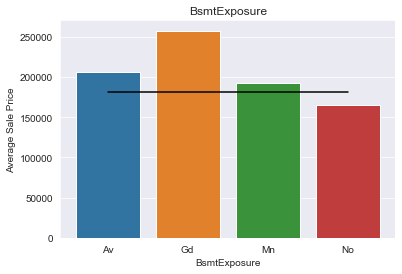

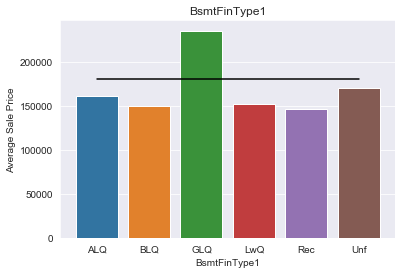

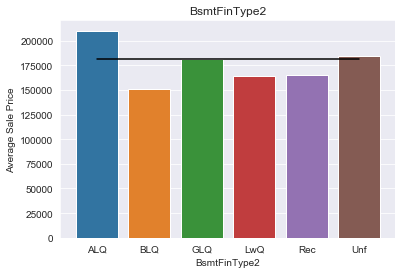

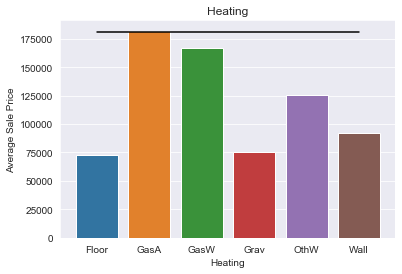

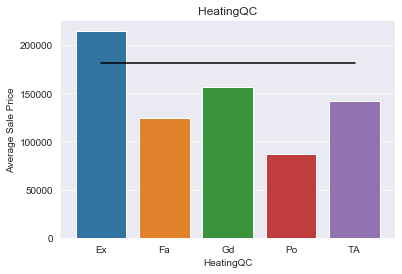

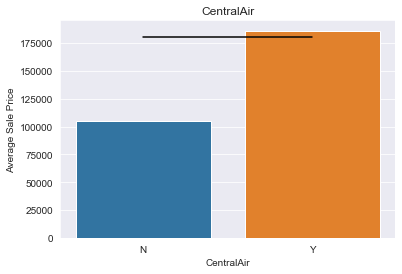

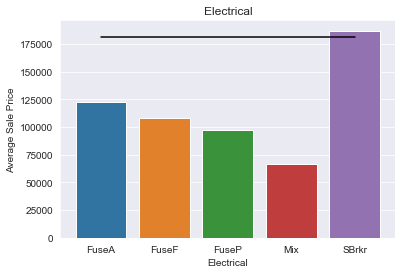

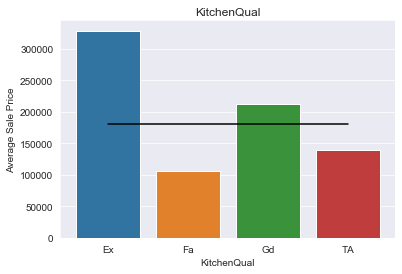

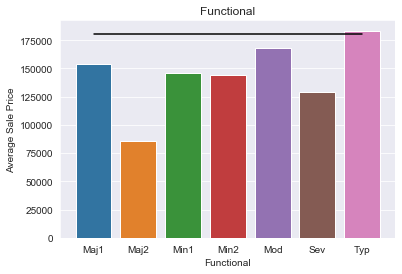

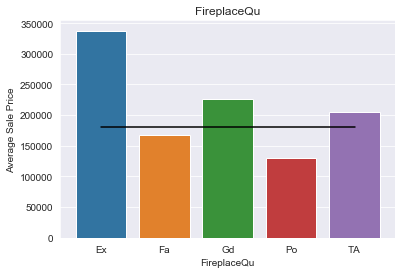

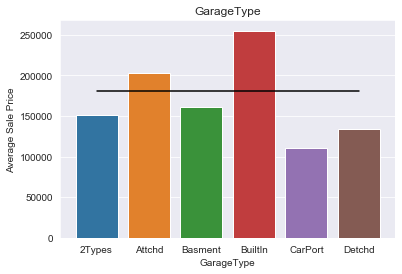

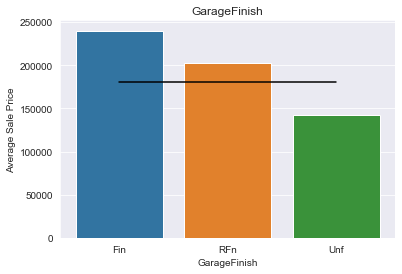

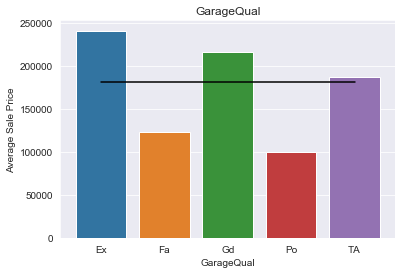

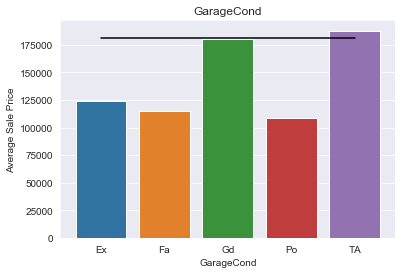

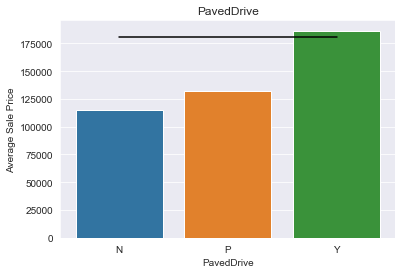

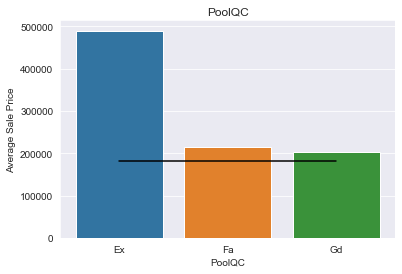

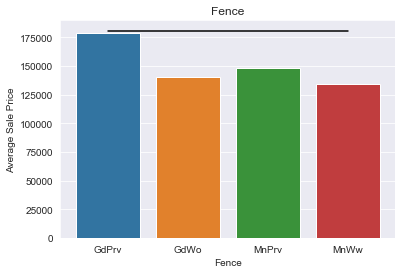

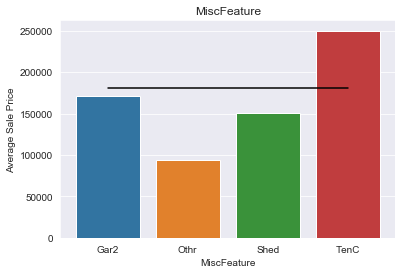

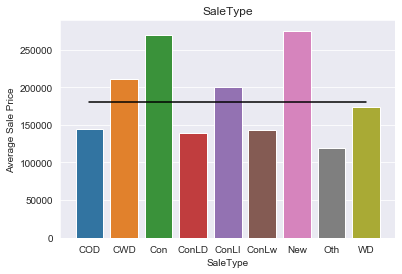

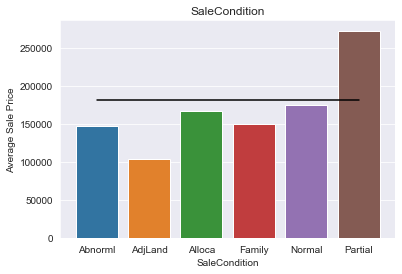

In [518]:
for column in df_train.dtypes[df_train.dtypes == 'object'].index:
    new= pd.DataFrame(df_train.groupby(column)['SalePrice'].mean()).transpose()
    sns.barplot(data=new, orient='v')
    sns.lineplot(x=new.columns, y=df_train['SalePrice'].mean(), c='k', dashes=True)
    plt.title(column)
    plt.ylabel('Average Sale Price')
    plt.show()

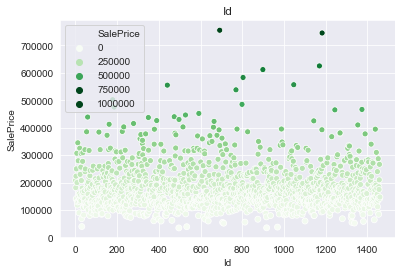

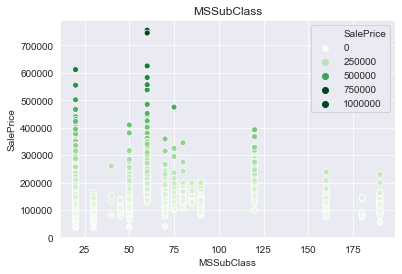

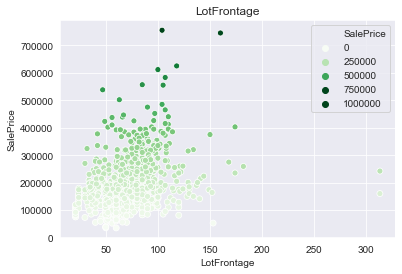

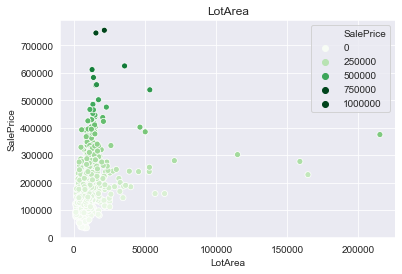

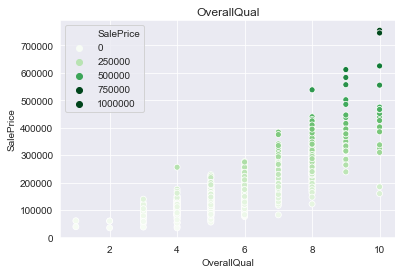

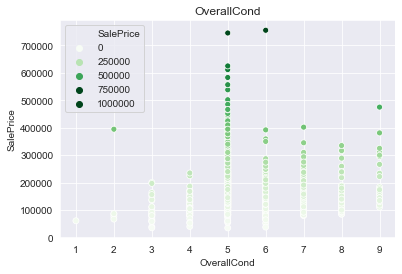

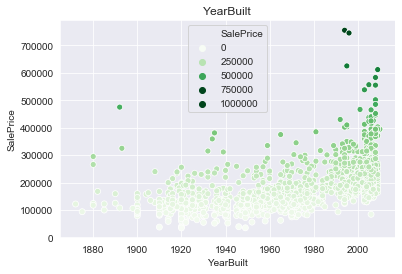

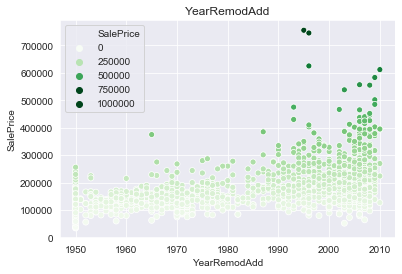

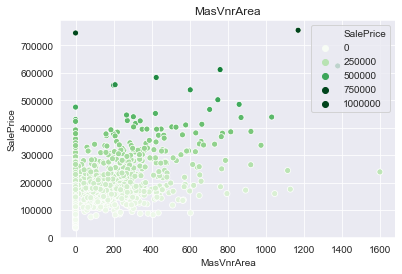

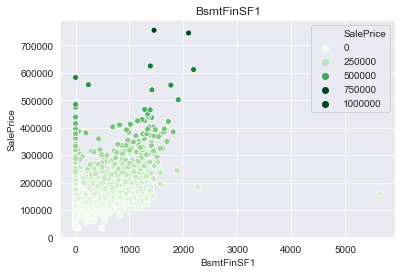

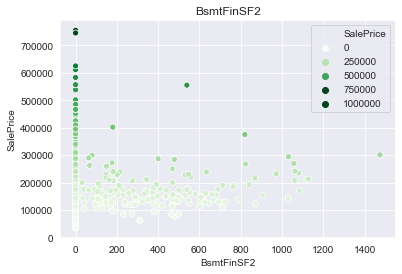

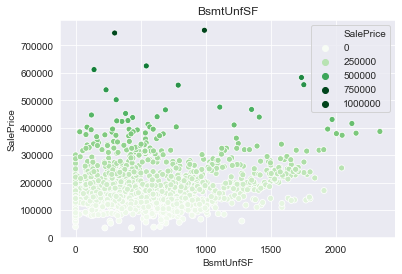

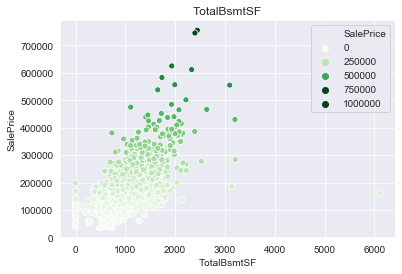

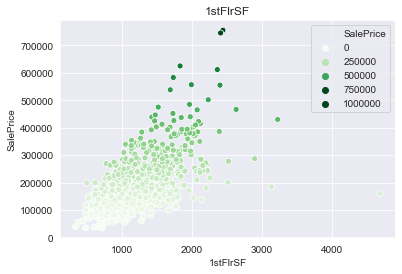

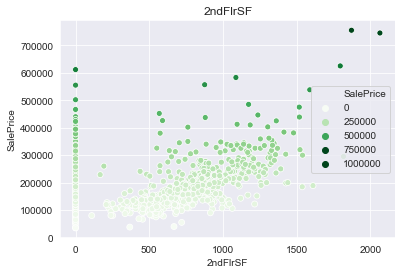

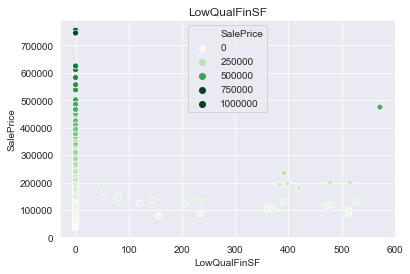

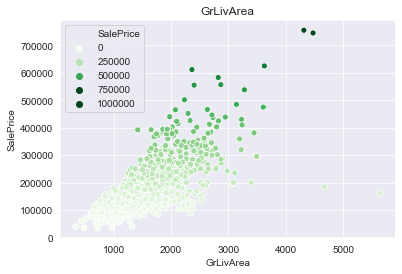

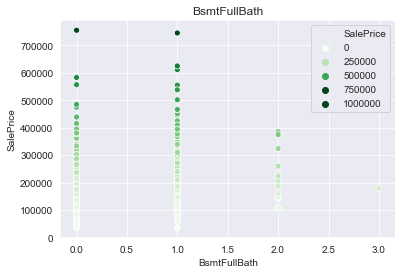

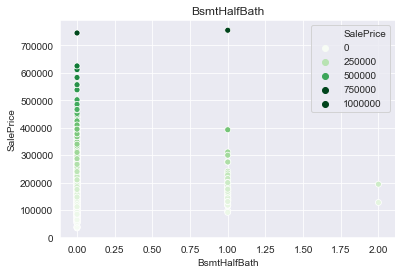

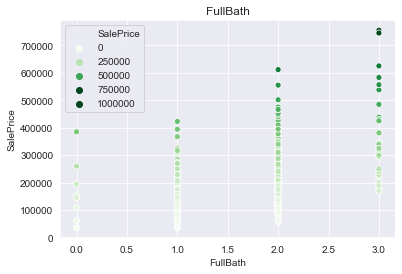

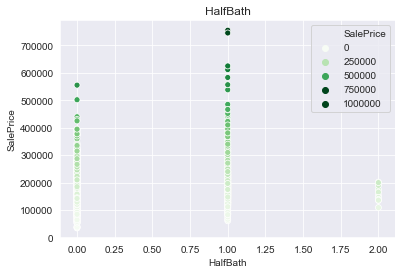

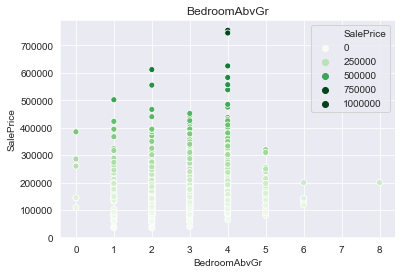

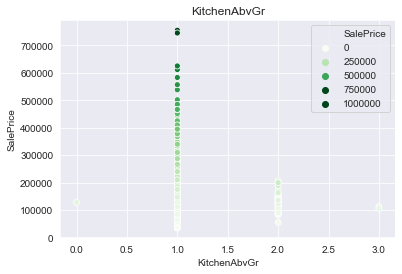

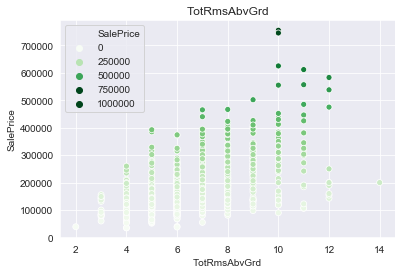

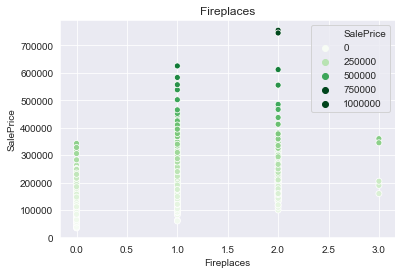

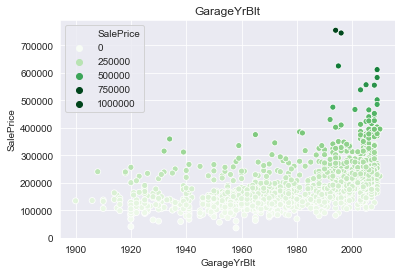

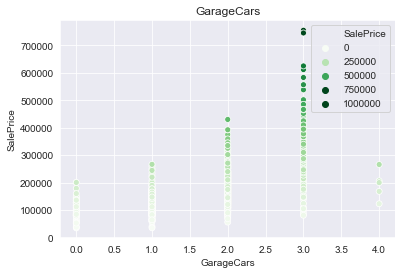

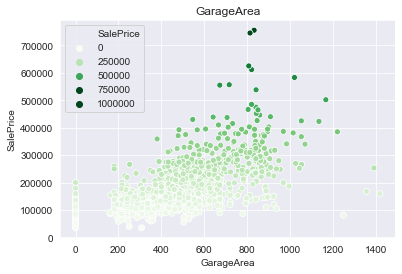

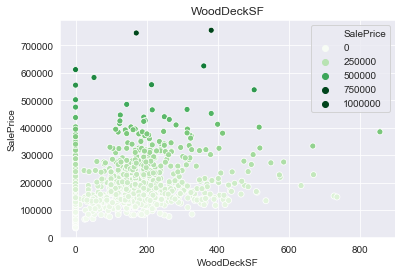

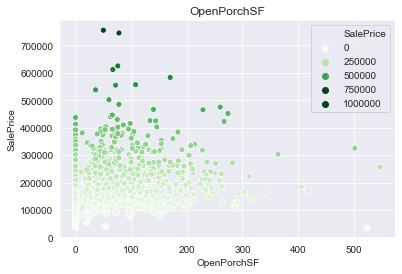

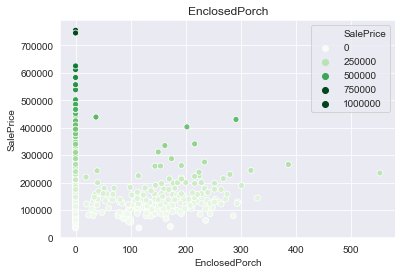

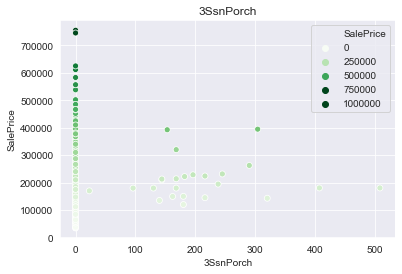

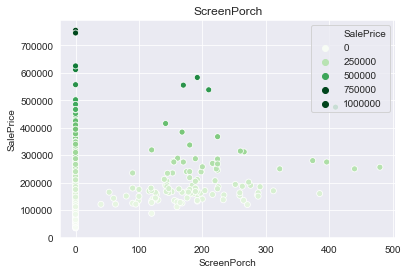

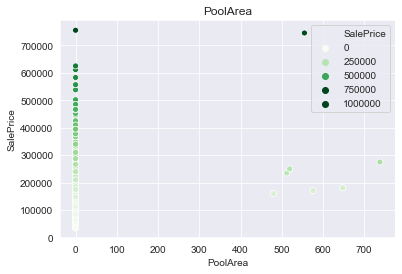

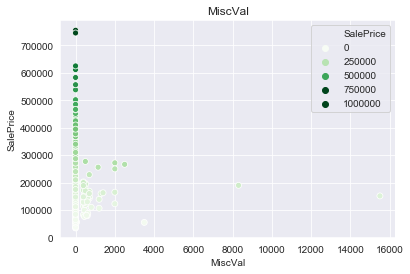

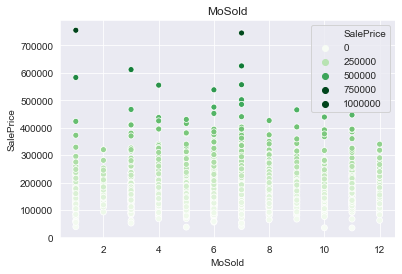

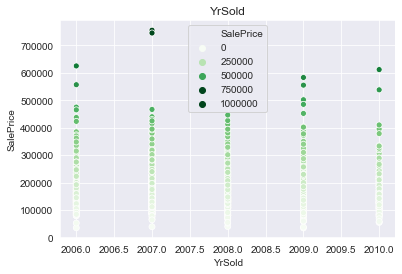

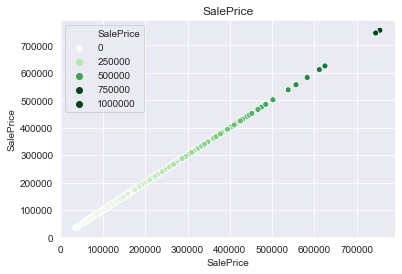

In [519]:

for column in df_train.dtypes[(df_train.dtypes == 'int64') | (df_train.dtypes == 'float')].index:
    plt.title(column)
    sns.scatterplot(x=column, y='SalePrice', data=df_train, hue='SalePrice', palette='Greens')
    plt.show()

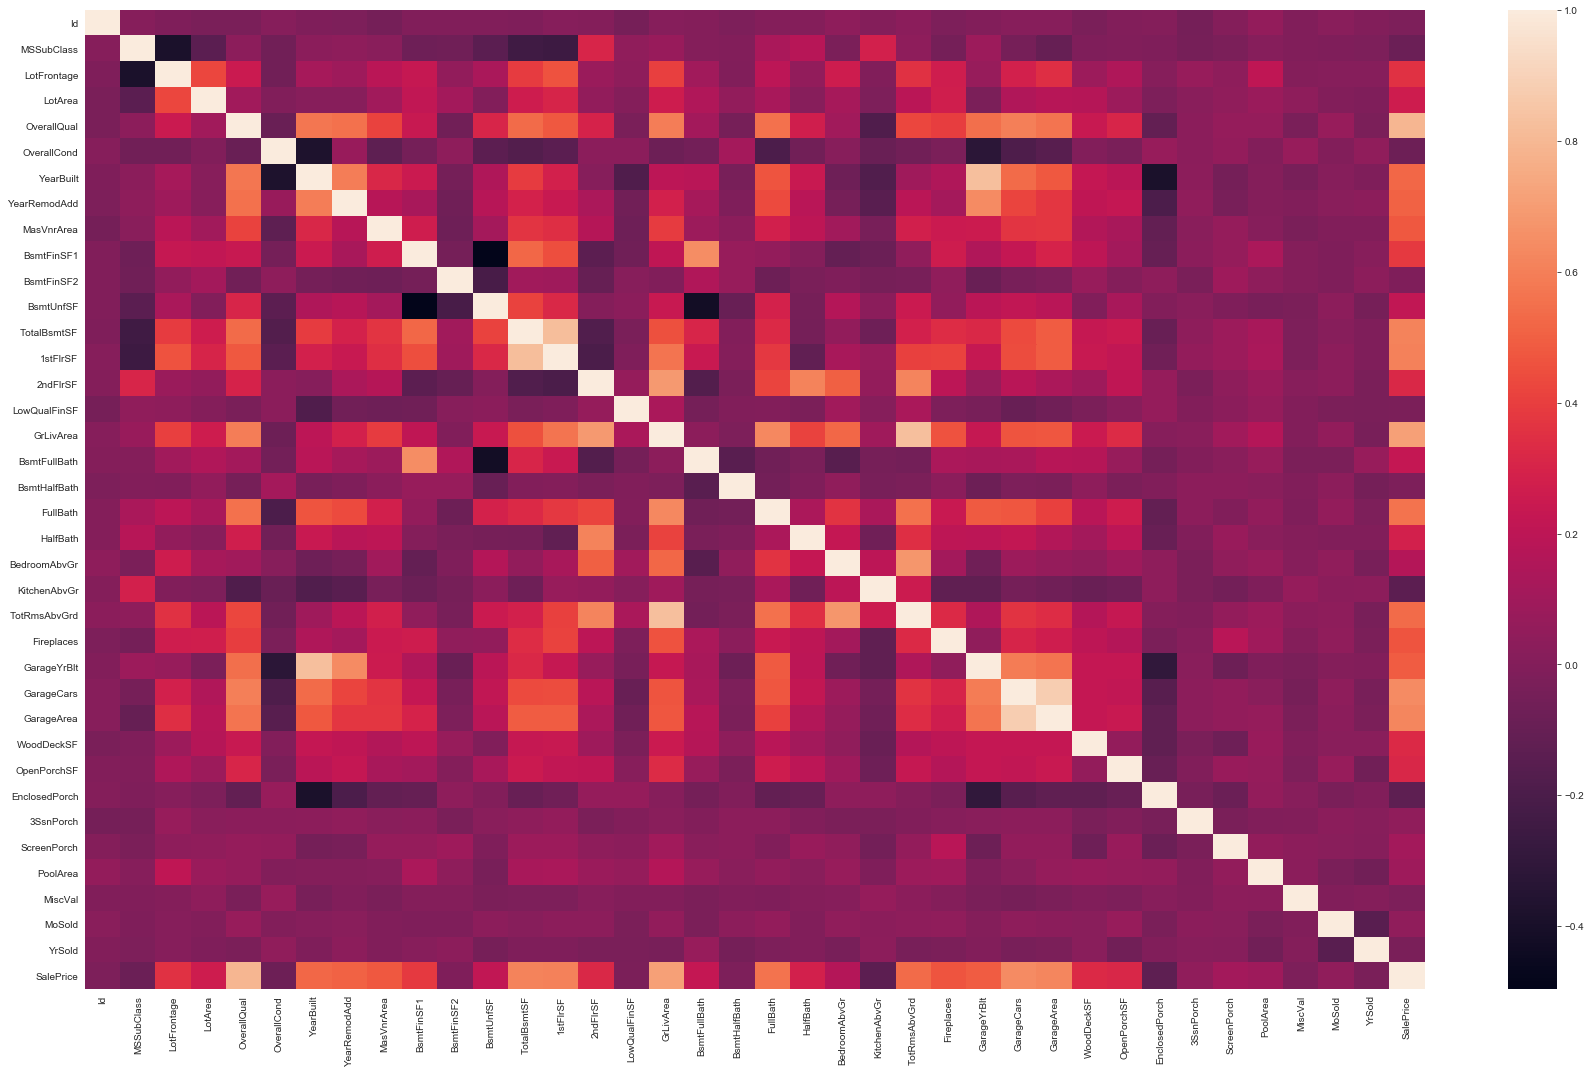

In [520]:
fig, ax = plt.subplots(figsize=(30,18))
sns.heatmap(df_train.corr())

In [521]:
all_corr = pd.DataFrame(df_train.corr().mean().sort_values(ascending=False), columns=['Mean Correlation'])
all_corr

Mean Correlation
GrLivArea              0.293636
SalePrice              0.293053
OverallQual            0.260795
TotRmsAbvGrd           0.239613
GarageCars             0.235509
GarageArea             0.234840
FullBath               0.228755
1stFlrSF               0.228687
TotalBsmtSF            0.225755
Fireplaces             0.178034
YearRemodAdd           0.177344
GarageYrBlt            0.173371
YearBuilt              0.171217
MasVnrArea             0.169392
LotFrontage            0.165250
2ndFlrSF               0.148467
OpenPorchSF            0.140120
BsmtFinSF1             0.132625
BedroomAbvGr           0.128137
WoodDeckSF             0.127875
HalfBath               0.126296
LotArea                0.120411
BsmtFullBath           0.081121
BsmtUnfSF              0.078781
PoolArea               0.075679
ScreenPorch            0.056039
MoSold                 0.039160
3SsnPorch              0.035447
MiscVal                0.024339
BsmtFinSF2             0.023151
Id                     0.022829
LowQualFinSF           0.022531
BsmtHalfBath           0.021040
KitchenAbvGr           0.014475
MSSubClass             0.013228
YrSold                 0.013155
OverallCond           -0.025846
EnclosedPorch         -0.027989

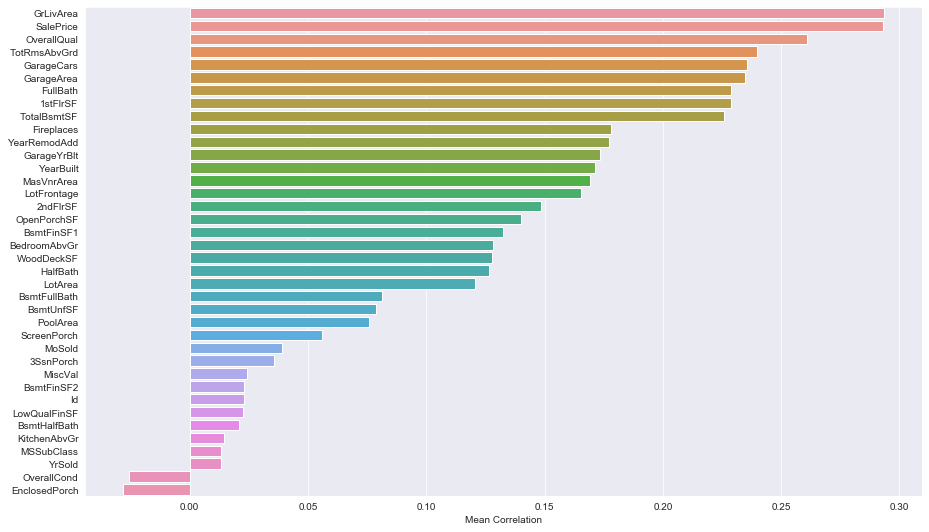

In [522]:
fig, ax = plt.subplots(figsize=(15,9))
_ = sns.barplot(y=all_corr.index, x='Mean Correlation', data=all_corr, ax=ax, orient='h')

In [523]:
sale_corr = pd.DataFrame(df_train.corr()['SalePrice'].sort_values(ascending=False))
sale_corr.rename(columns={'SalePrice' : 'Corr w/ SalePrice'}, inplace=True)
sale_corr

Corr w/ SalePrice
SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
GarageYrBlt             0.486362
MasVnrArea              0.477493
Fireplaces              0.466929
BsmtFinSF1              0.386420
LotFrontage             0.351799
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
HalfBath                0.284108
LotArea                 0.263843
BsmtFullBath            0.227122
BsmtUnfSF               0.214479
BedroomAbvGr            0.168213
ScreenPorch             0.111447
PoolArea                0.092404
MoSold                  0.046432
3SsnPorch               0.044584
BsmtFinSF2             -0.011378
BsmtHalfBath           -0.016844
MiscVal                -0.021190
Id                     -0.021917
LowQualFinSF           -0.025606
YrSold                 -0.028923
OverallCond            -0.077856
MSSubClass             -0.084284
EnclosedPorch          -0.128578
KitchenAbvGr           -0.135907

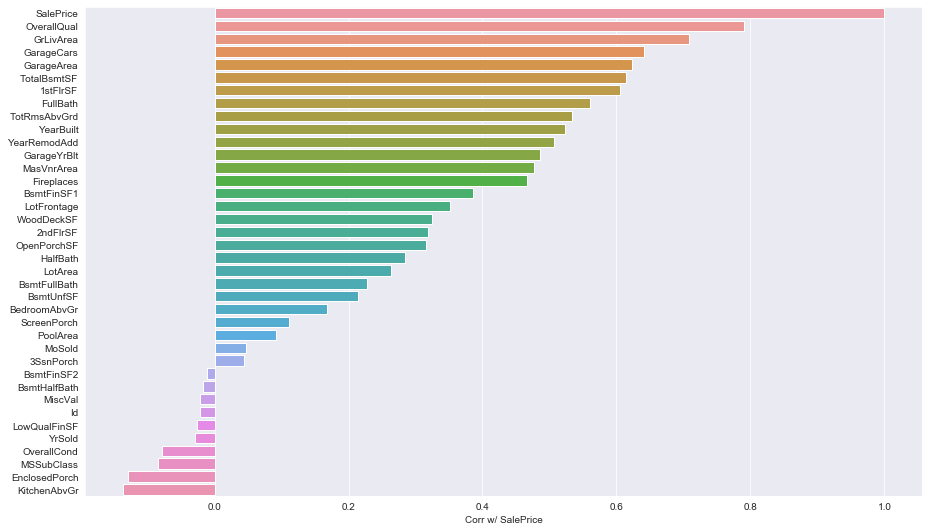

In [524]:
fig, ax = plt.subplots(figsize=(15,9))
_ = sns.barplot(y=sale_corr.index, x='Corr w/ SalePrice', data=sale_corr, ax=ax, orient='h')

### Pre-processing: Imputing missing values 

In [525]:
display(null_df)

train  test
Missing Columns             
Alley             1369  1352
BsmtCond            37    45
BsmtExposure        38    44
BsmtFinSF1           0     1
BsmtFinSF2           0     1
BsmtFinType1        37    42
BsmtFinType2        38    42
BsmtFullBath         0     2
BsmtHalfBath         0     2
BsmtQual            37    44
BsmtUnfSF            0     1
Electrical           1     0
Exterior1st          0     1
Exterior2nd          0     1
Fence             1179  1169
FireplaceQu        690   730
Functional           0     2
GarageArea           0     1
GarageCars           0     1
GarageCond          81    78
GarageFinish        81    78
GarageQual          81    78
GarageType          81    76
GarageYrBlt         81    78
KitchenQual          0     1
LotFrontage        259   227
MSZoning             0     4
MasVnrArea           8    15
MasVnrType           8    16
MiscFeature       1406  1408
PoolQC            1453  1456
SaleType             0     1
TotalBsmtSF          0     1
Utilities            0     2

So although it apears as if the train & test data are missing hundreds of values for the columns: Alley, Fence, FireplaceQu, MiscFeature, PoolQC, GaragrArea, BsmtCond etc. but a look into the data description file shows us that the NaN values represent the fact that the house does not have the respective feature e.g. no alley, pool, fireplace, fence, garage, basement etc, so we'll replace these with 'DoNotHave'.

In [526]:
columns=['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC', 'GarageArea', 'GarageCars', 'GarageCond', 
         'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
         'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath','BsmtQual','BsmtUnfSF',
         ]
for df in data:
    for column in columns:
        df[column].fillna('DoNotHave', inplace=True)

In [527]:
for df in datasets:
    display(df[columns].isnull().sum())

Alley           0
Fence           0
FireplaceQu     0
MiscFeature     0
PoolQC          0
GarageArea      0
GarageCars      0
GarageCond      0
GarageFinish    0
GarageQual      0
GarageType      0
GarageYrBlt     0
BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFinType1    0
BsmtFinType2    0
BsmtFullBath    0
BsmtHalfBath    0
BsmtQual        0
BsmtUnfSF       0
dtype: int64

Alley           0
Fence           0
FireplaceQu     0
MiscFeature     0
PoolQC          0
GarageArea      0
GarageCars      0
GarageCond      0
GarageFinish    0
GarageQual      0
GarageType      0
GarageYrBlt     0
BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFinType1    0
BsmtFinType2    0
BsmtFullBath    0
BsmtHalfBath    0
BsmtQual        0
BsmtUnfSF       0
dtype: int64

In [528]:
df_train.corr()['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64

In [529]:
# Impute the 1 missing value in 'TotalBsmtSF' column of test data with a simple lin reg prediction using '1stFlrSF'
l1 = LinearRegression().fit((df_all['1stFlrSF'].drop(2120)).values.reshape(-1,1), (df_all['TotalBsmtSF'].drop(2120).values))
df_test['TotalBsmtSF'].fillna(int(l1.predict(df_all.iloc[2120,:]['1stFlrSF'].reshape(-1,1))), inplace=True)
df_all['TotalBsmtSF'].fillna(int(l1.predict(df_all.iloc[2120,:]['1stFlrSF'].reshape(-1,1))), inplace=True)

In [530]:
# Impute 200+ missing values each for 'LotFrontage' column in train & test via linear regression predictor 
X = df_all[df_all['LotFrontage'].notnull()][['1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF']].values
y = df_all[df_all['LotFrontage'].notnull()][['LotFrontage']].values
data =[df_train, df_test, df_all]
l2 = LinearRegression().fit(X,y)

In [531]:
for df in data:
    y_pred = l2.predict(df[df['LotFrontage'].isnull()][['1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF']].values)
    #df[df['LotFrontage'].isnull()]['LotFrontage'].replace({np.nan:y_pred}, inplace=True)
    df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = y_pred

In [532]:
null_train = pd.DataFrame(df_train.isnull().sum()[df_train.isnull().sum() > 0], columns=['train'])
null_test = pd.DataFrame(df_test.isnull().sum()[df_test.isnull().sum() > 0], columns=['test'])
null_all = pd.DataFrame(df_all.isnull().sum()[df_all.isnull().sum() > 0], columns=['all'])
null_df = pd.merge(null_train, null_test, how='outer', left_index=True, right_index=True).fillna(0).astype('int')
null_df = pd.merge(null_df, null_all, how='outer', left_index=True, right_index=True).fillna(0).astype('int')
null_df.index.name = 'Missing Columns'
display(null_df)

train  test   all
Missing Columns                   
Electrical           1     0     1
Exterior1st          0     1     1
Exterior2nd          0     1     1
Functional           0     2     2
KitchenQual          0     1     1
MSZoning             0     4     4
MasVnrArea           8    15    23
MasVnrType           8    16    24
SalePrice            0     0  1459
SaleType             0     1     1
Utilities            0     2     2

In [533]:
# # Impute missing values for the rest of the colums - mostly using the mode
for df in data:
    df['Electrical'].fillna(df_all['Electrical'].mode()[0], inplace=True)
    df['Exterior1st'].fillna(df_all[(df_all['OverallQual'] == 5) & (df_all['GrLivArea'] >= 1000) & (df_all['GrLivArea'] <= 2000)]['Exterior1st'].mode()[0], inplace=True)
    df['Exterior2nd'].fillna(df_all[(df_all['OverallQual'] == 5) & (df_all['GrLivArea'] >= 1000) & (df_all['GrLivArea'] <= 2000)]['Exterior2nd'].mode()[0], inplace=True)
    df['Functional'].fillna(df_all[(df_all['OverallQual'].isin([1,2,3,4,5]))]['Functional'].mode()[0], inplace=True)
    df['KitchenQual'].fillna(df_all[(df_all['OverallQual'].isin([5]))]['KitchenQual'].mode()[0], inplace=True)
    df['TotalBsmtSF'].fillna(df_all[df_all['BsmtCond'] == 'DoNotHave']['TotalBsmtSF'].mode()[0], inplace=True)
    df.loc[(df['MSZoning'].isnull()) & (df['MSSubClass'] == 20), 'MSZoning'] = 'RL'
    df.loc[(df['MSZoning'].isnull()) & ((df['MSSubClass'] == 30) | (df['MSSubClass'] == 70)), 'MSZoning'] = 'RM'
    df.loc[(df['MasVnrType'].isnull()) & (df['OverallQual'] <= 7), 'MasVnrType'] = 'None' 
    df.loc[(df['MasVnrArea'].isnull()) & (df['OverallQual'] <= 7), 'MasVnrArea'] = 0 
    df.loc[(df['MasVnrType'].isnull()) & (df['OverallQual'] >= 8), 'MasVnrType'] = 'BrkFace'
    df.loc[(df['MasVnrArea'].isnull()) & (df['OverallQual'] >= 8), 'MasVnrArea'] = 362
    df['SaleType'].fillna(df_all['SaleType'].mode()[0], inplace=True)
    df['Utilities'].fillna(df_all['Utilities'].mode()[0], inplace=True)

In [534]:
null_train = pd.DataFrame(df_train.isnull().sum()[df_train.isnull().sum() > 0], columns=['train'])
null_test = pd.DataFrame(df_test.isnull().sum()[df_test.isnull().sum() > 0], columns=['test'])
null_all = pd.DataFrame(df_all.isnull().sum()[df_all.isnull().sum() > 0], columns=['all'])
null_df = pd.merge(null_train, null_test, how='outer', left_index=True, right_index=True).fillna(0).astype('int')
null_df = pd.merge(null_df, null_all, how='outer', left_index=True, right_index=True).fillna(0).astype('int')
null_df.index.name = 'Missing Columns'
display(null_df)

train  test   all
Missing Columns                   
SalePrice            0     0  1459

### Pre-processing: More Imputation + Feature Engineering, Tranformation, Selection & Scaling

Now that we've imputed all of the missing values from each column of the both dataframes, we can move on to create useful features from existing ones that are good predictors of Sale Price. We'll try our best to combine not very useful predictors into useful ones. In this case there are so many good features already made for us, so we will focus our efforts on selecting the most useful of these and dropping the less useful ones.

In [535]:
pd.set_option('display.max_columns', 100)

In [536]:
df_all.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477929
Fireplaces       0.466929
LotFrontage      0.358049
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [537]:
df_all['BsmtFullBath'].value_counts()

0.0          1705
1.0          1172
2.0            38
DoNotHave       2
3.0             2
Name: BsmtFullBath, dtype: int64

In [538]:
(df_all == 'DoNotHave').sum()[(df_all == 'DoNotHave').sum() > 0]

Alley           2721
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
dtype: int64

In [539]:
# Convert sale month from int to object
for df in data:
    df['MoSold'] = df['MoSold'].astype('object')
# Replace DoNotHave's with 0 & Convert from object to int 
    df.loc[(df['BsmtFinSF1'] == 'DoNotHave') , 'BsmtFinSF1'] = 0
    df['BsmtFinSF1'] = df['BsmtFinSF1'].astype('int64')
    df.loc[(df['BsmtFinSF2'] == 'DoNotHave') , 'BsmtFinSF2'] = 0
    df['BsmtFinSF2'] = df['BsmtFinSF2'].astype('int64')
    df.loc[df['BsmtFullBath'] == 'DoNotHave', 'BsmtFullBath'] = 0
    df['BsmtFullBath'] = df['BsmtFullBath'].astype('int64')
    df.loc[df['BsmtHalfBath'] == 'DoNotHave', 'BsmtHalfBath'] = 0
    df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('int64')
    df.loc[df['BsmtUnfSF'] == 'DoNotHave', 'BsmtUnfSF'] = 0
    df['BsmtUnfSF'] = df['BsmtUnfSF'].astype('int64')
    df.loc[df['GarageCars'] == 'DoNotHave', 'GarageCars'] = 0
    df['GarageCars'] = df['GarageCars'].astype('int64')
    df.loc[df['GarageArea'] == 'DoNotHave', 'GarageArea'] = 0
    df['GarageArea'] = df['GarageArea'].astype('int64')

# Group continuous variables such as garage build year into discrete Bins because easier to encode then remove old feature
    _ = df['GarageYrBlt'].replace('DoNotHave',0)
    df['GarageBldYr']= pd.qcut(_, q=[0.0, 0.055, 0.244, 0.433, 0.622, 0.811, 1.0], labels=['vo', 'o', 'so', 'sn', 'n', 'vn'])
    df.drop('GarageYrBlt', axis=1, inplace=True)

# Add has tennis court feature & drop MiscFeature column
    df['TennisC?'] = (df['MiscFeature'] == 'TenC').astype('int64')
    df.drop('MiscFeature', axis=1, inplace=True)
    
# Add has excellent pool feature & drop Pool quality feature
    df['ExcPool?'] = (df['PoolQC'] == 'Ex').astype('int64')
    df.drop('PoolQC', axis=1, inplace=True)
    
# Drop utilities column as all but 1/2919 house's have AllPub, so it's not a good predictor
    df.drop('Utilities', axis=1, inplace=True)

In [540]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   int64   
 2   MSZoning       2919 non-null   object  
 3   LotFrontage    2919 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   object  
 6   Alley          2919 non-null   object  
 7   LotShape       2919 non-null   object  
 8   LandContour    2919 non-null   object  
 9   LotConfig      2919 non-null   object  
 10  LandSlope      2919 non-null   object  
 11  Neighborhood   2919 non-null   object  
 12  Condition1     2919 non-null   object  
 13  Condition2     2919 non-null   object  
 14  BldgType       2919 non-null   object  
 15  HouseStyle     2919 non-null   object  
 16  OverallQual    2919 non-null   int64   
 17  OverallCond    2919 non-null   in

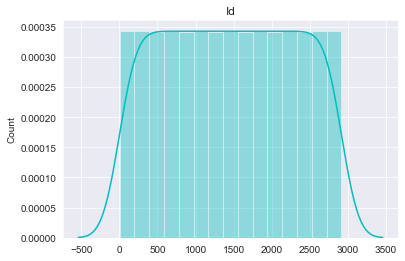

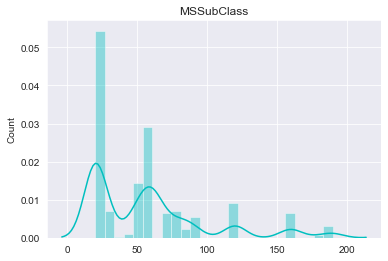

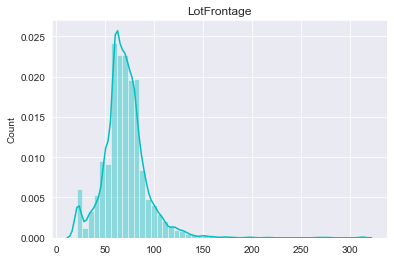

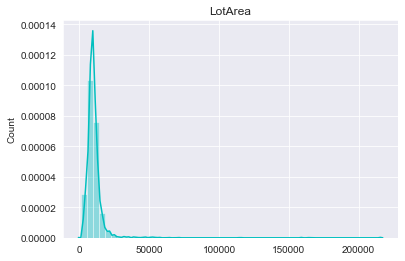

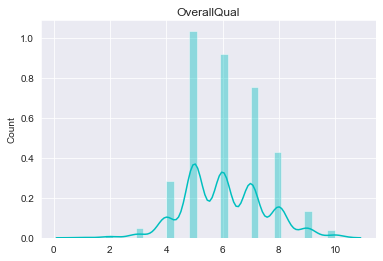

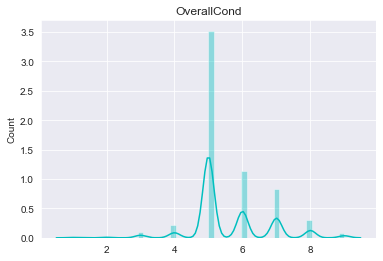

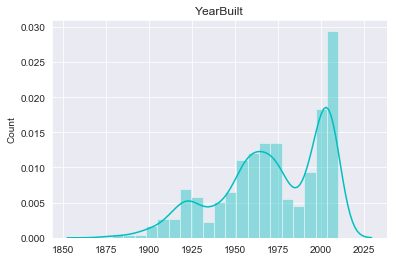

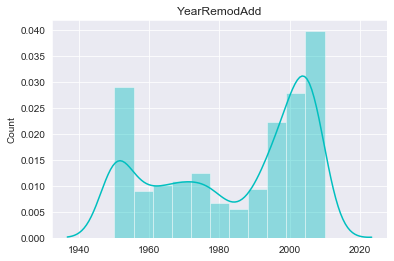

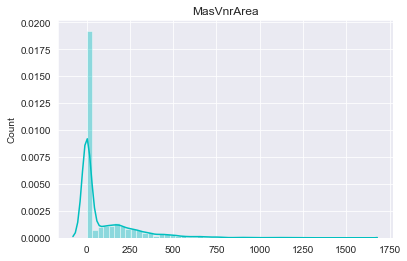

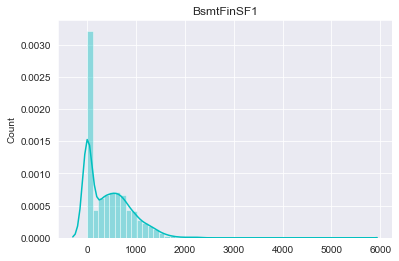

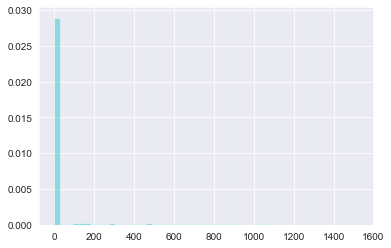

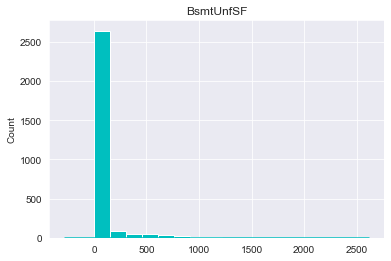

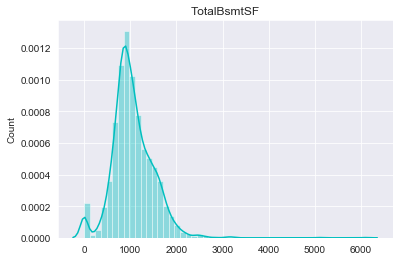

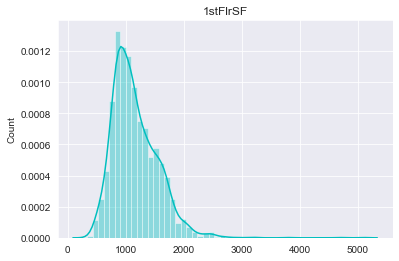

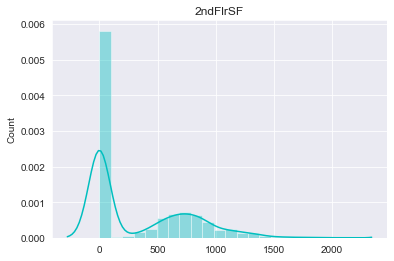

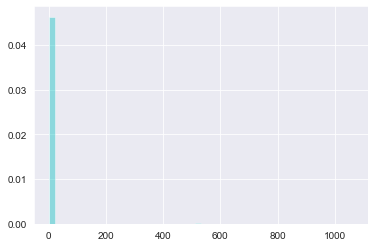

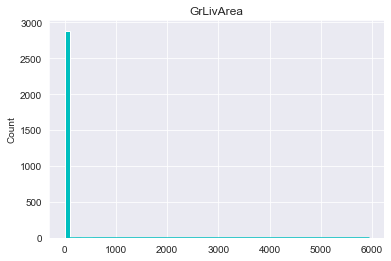

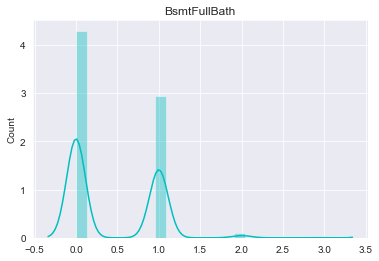

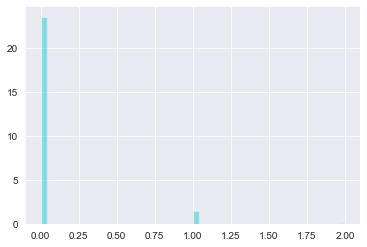

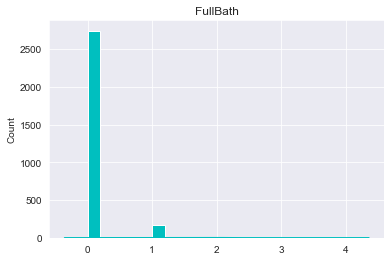

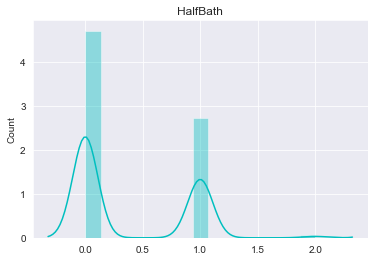

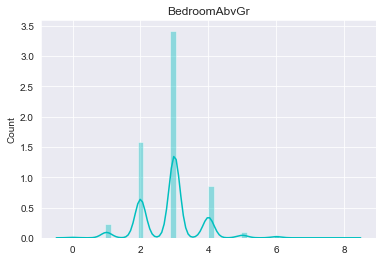

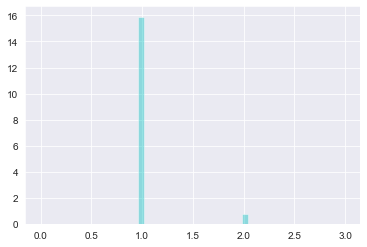

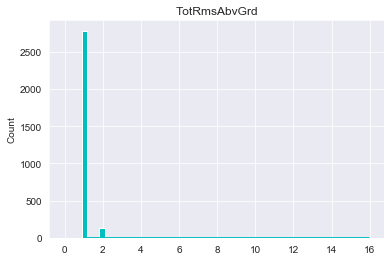

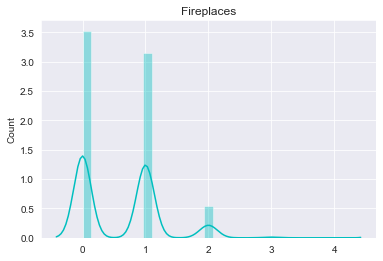

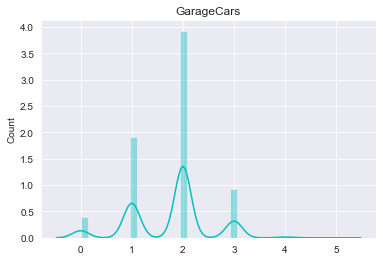

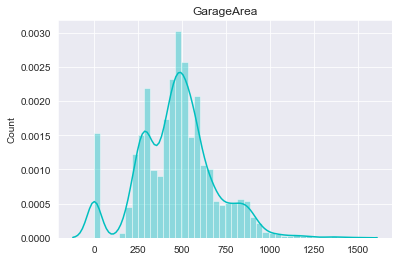

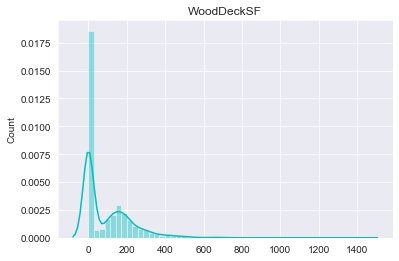

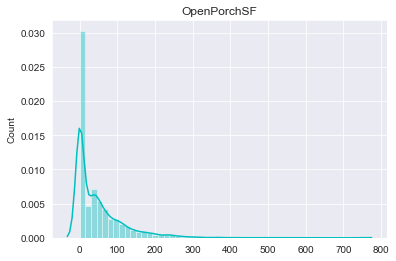

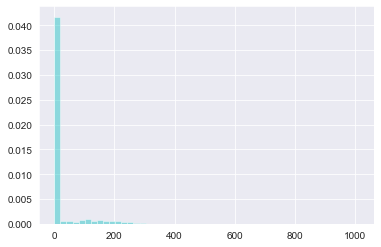

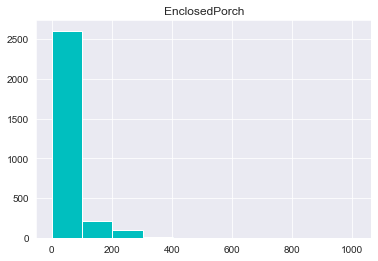

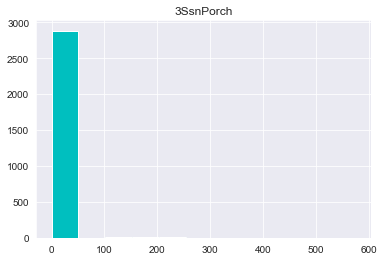

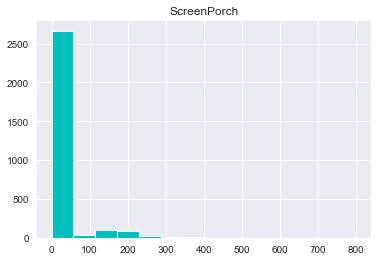

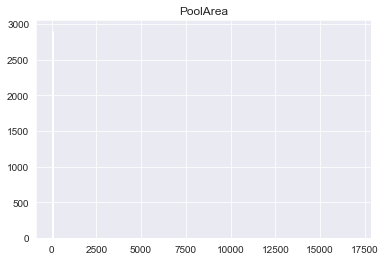

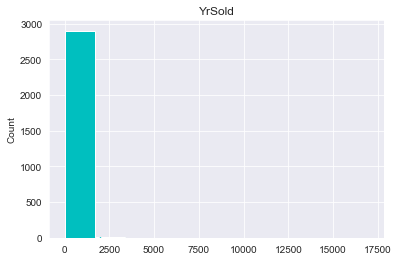

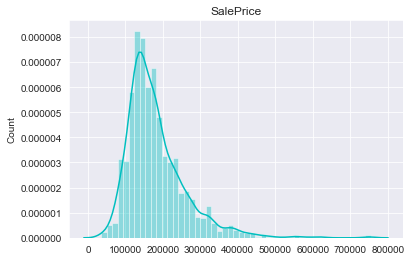

ValueError: hist method requires numerical columns, nothing to plot.

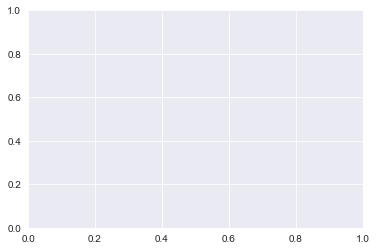

In [542]:
for column in df_all.dtypes[df_all.dtypes != 'object'].index:
    #df_train[[column]].hist()
    try:
        sns.distplot(df_all[[column]], color='c')
    except:
        df_all[[column]].hist(color='c')
    else:
        plt.title(column)
        plt.ylabel('Count')
        plt.show()

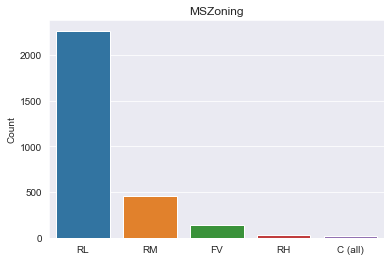

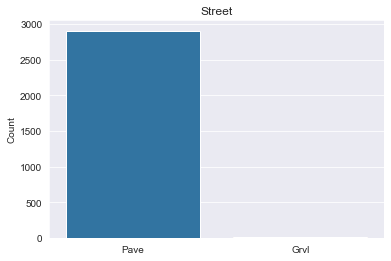

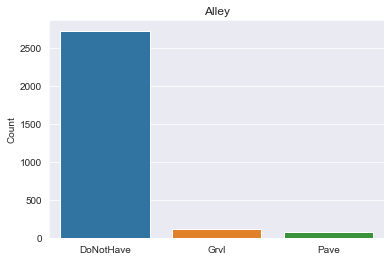

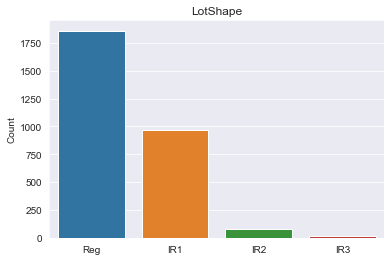

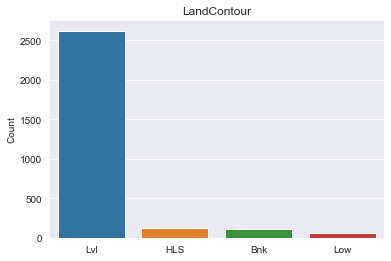

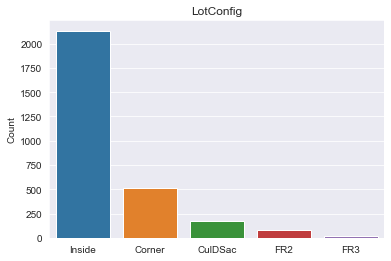

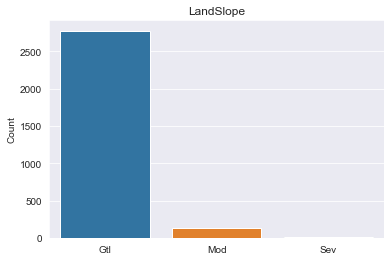

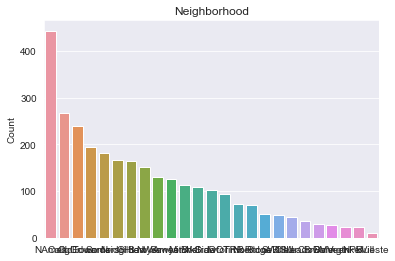

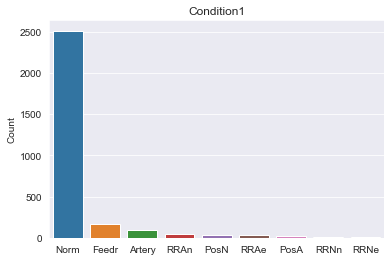

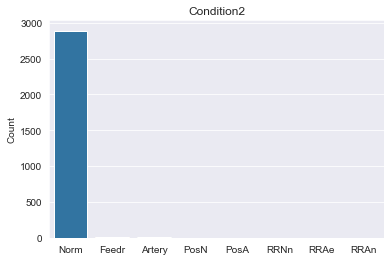

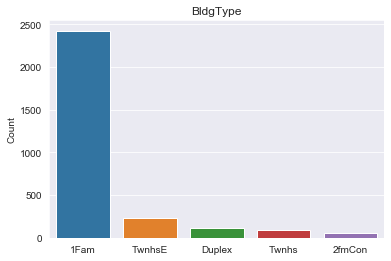

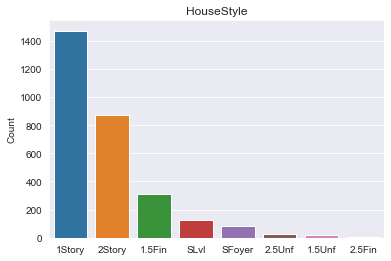

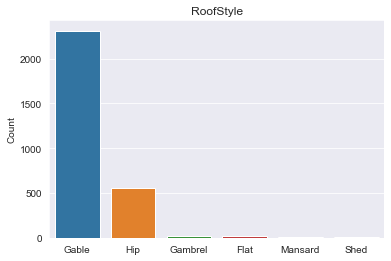

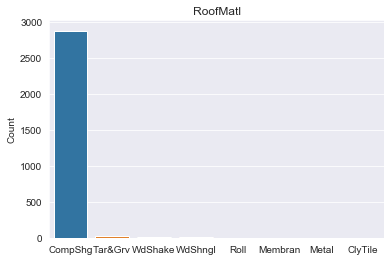

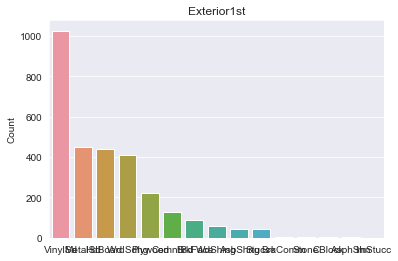

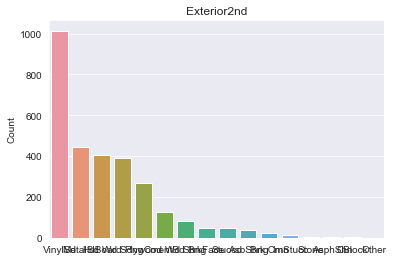

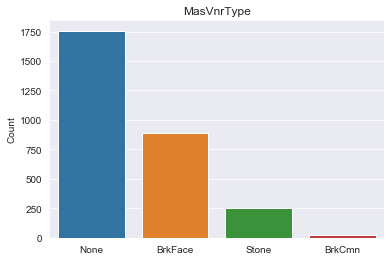

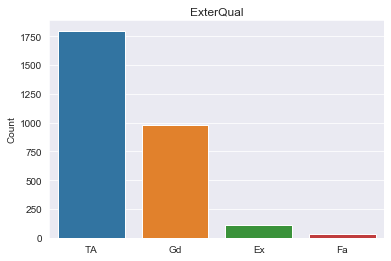

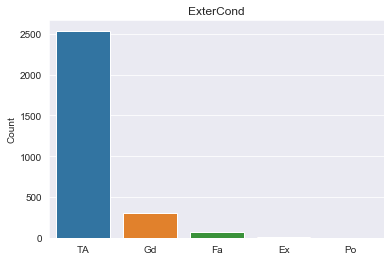

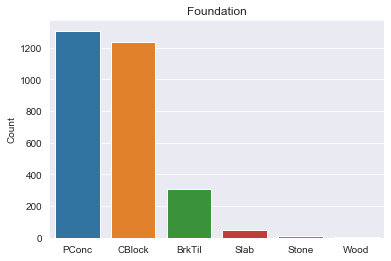

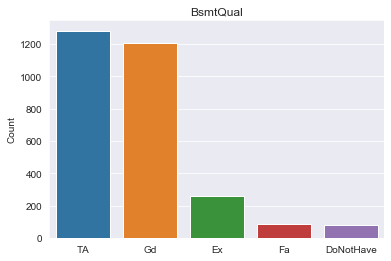

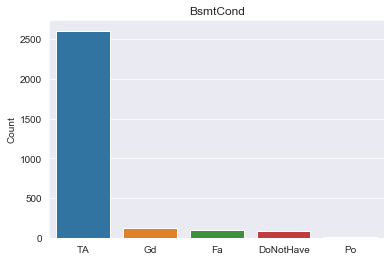

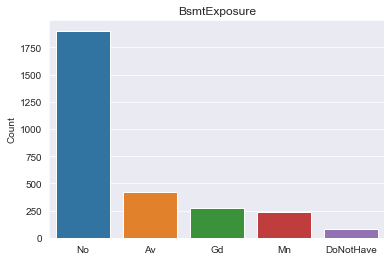

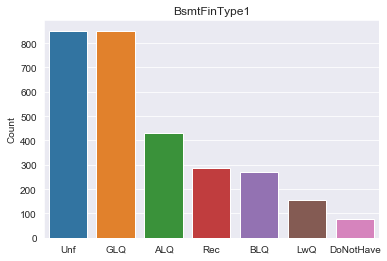

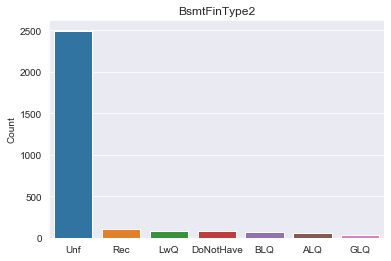

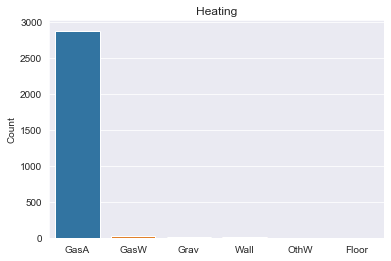

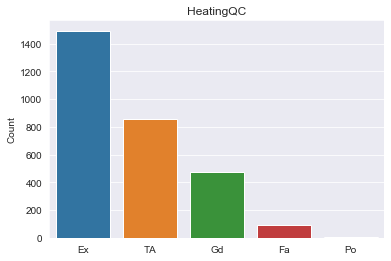

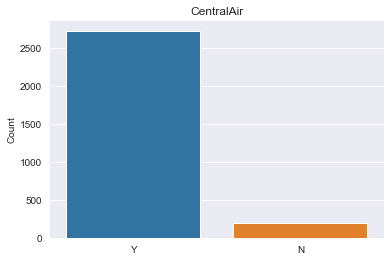

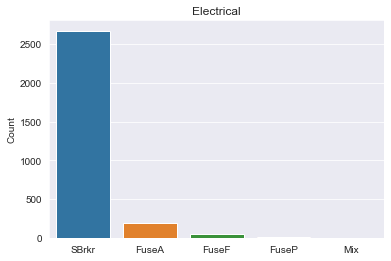

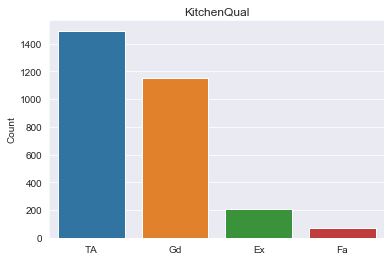

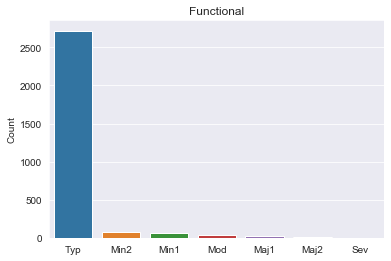

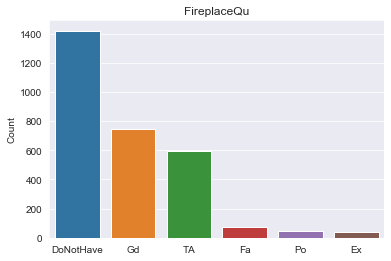

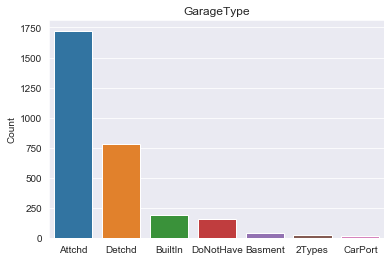

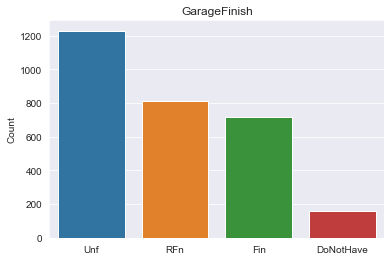

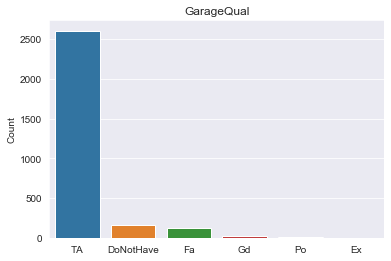

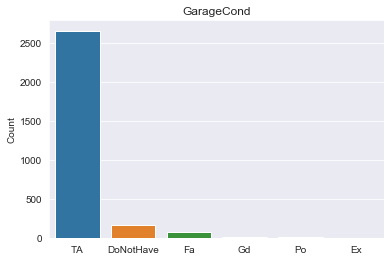

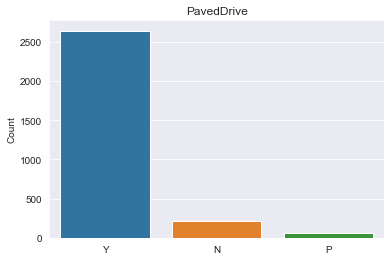

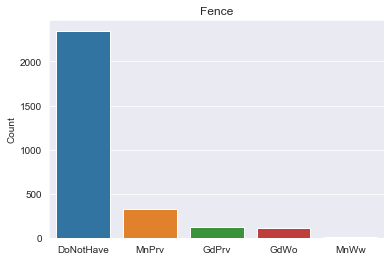

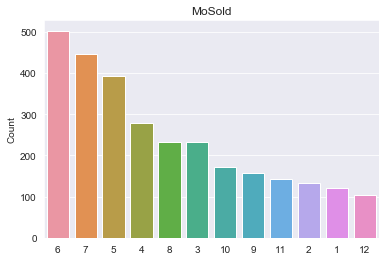

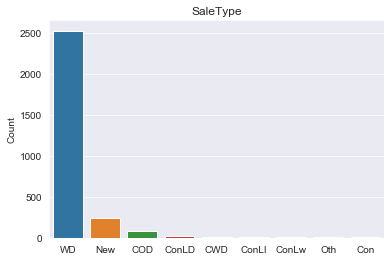

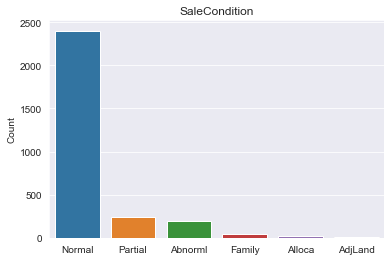

In [543]:
for column in df_all.dtypes[df_all.dtypes == 'object'].index:
    new=pd.DataFrame(df_all[column].value_counts()).transpose()
    sns.barplot(data=new, orient='v')
    plt.title(column)
    plt.ylabel('Count')
    plt.show()

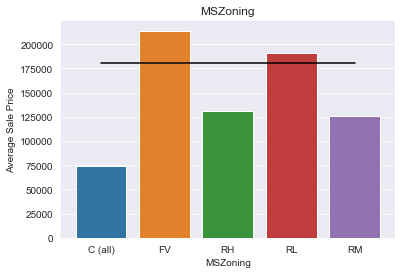

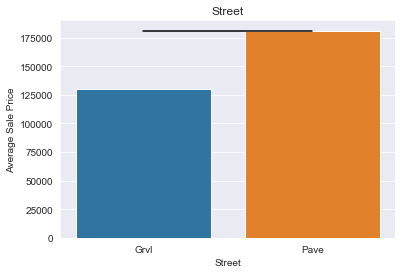

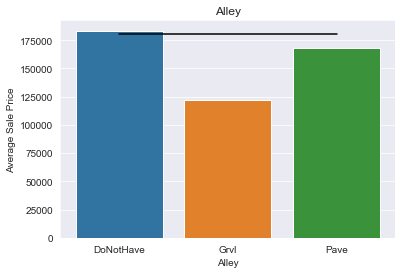

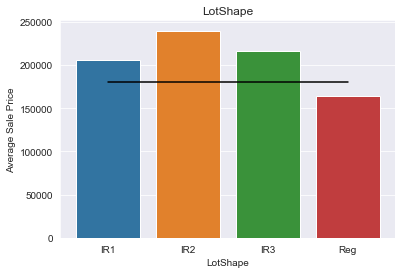

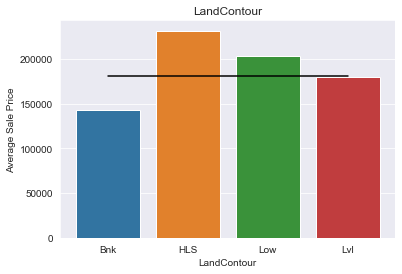

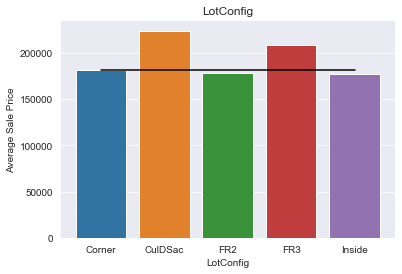

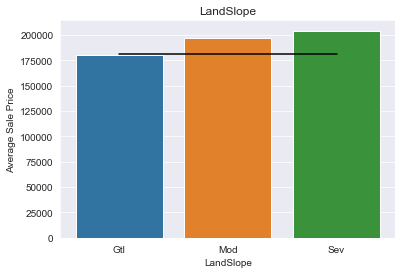

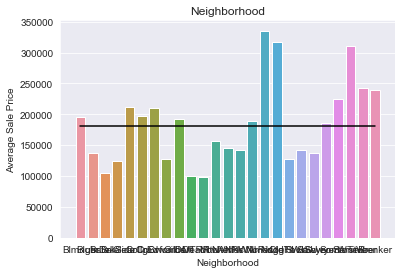

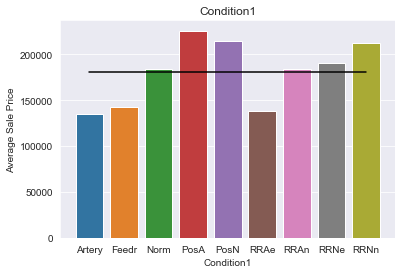

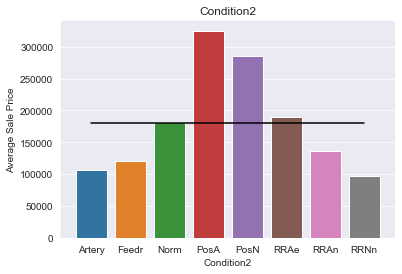

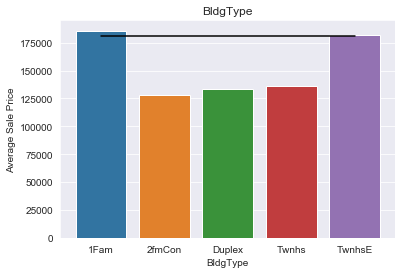

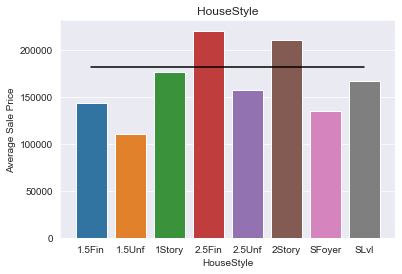

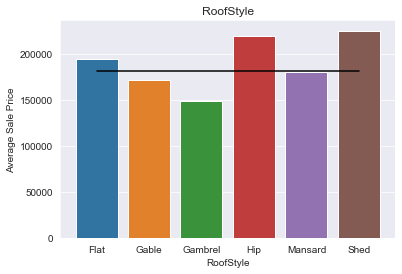

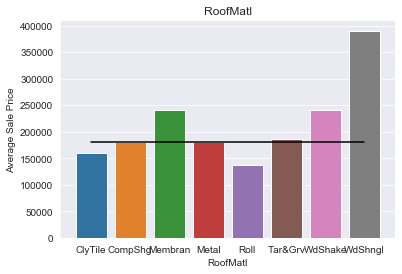

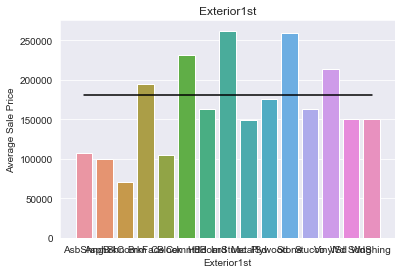

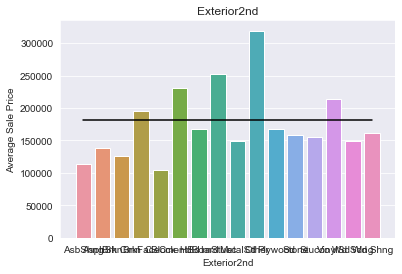

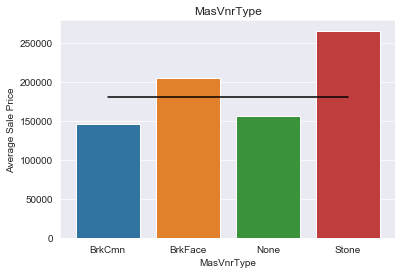

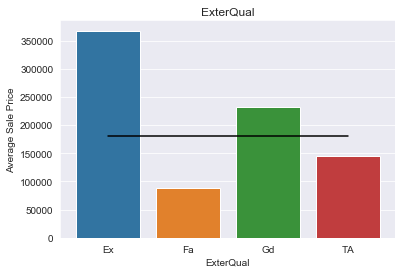

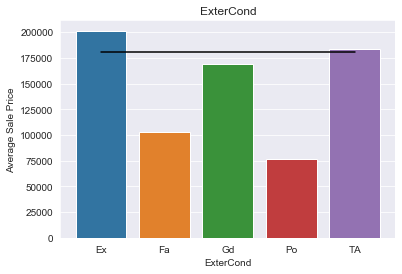

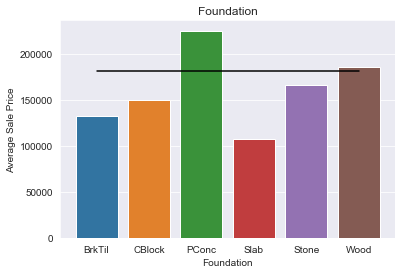

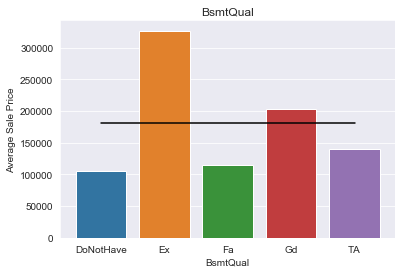

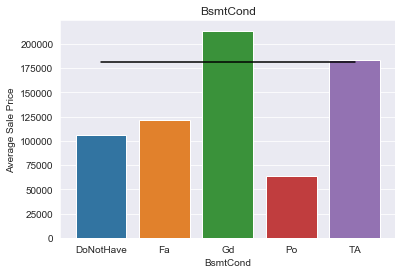

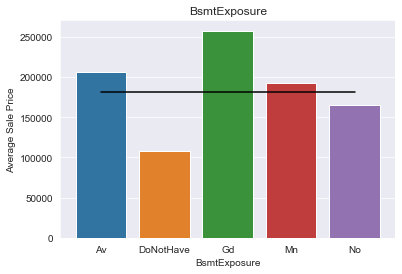

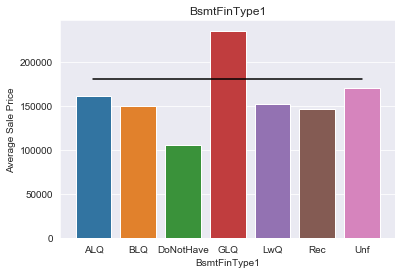

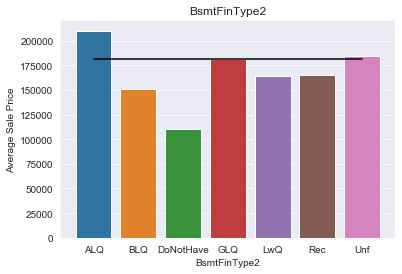

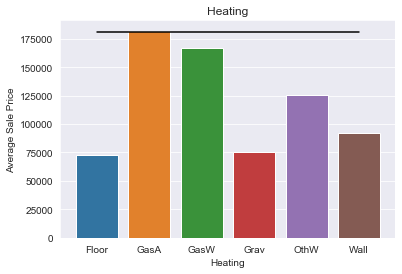

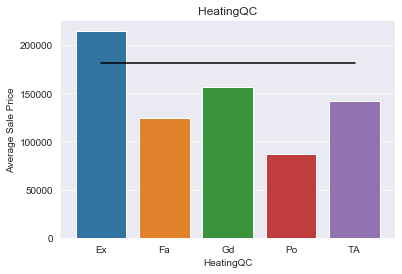

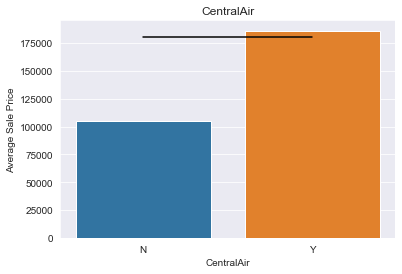

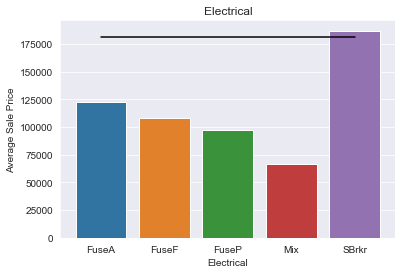

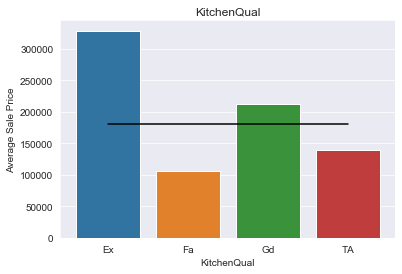

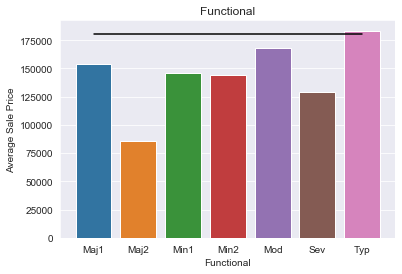

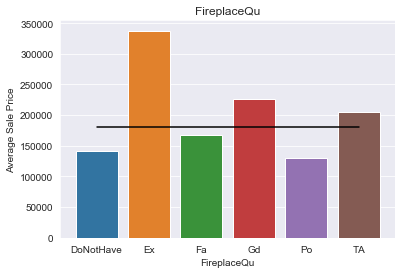

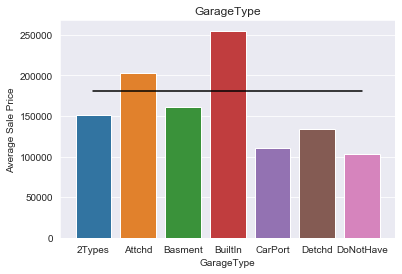

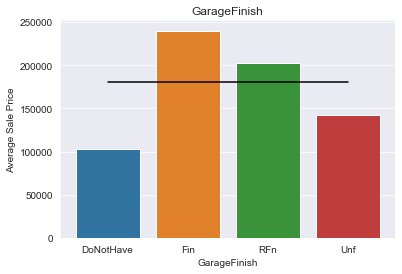

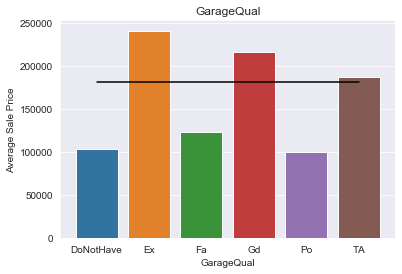

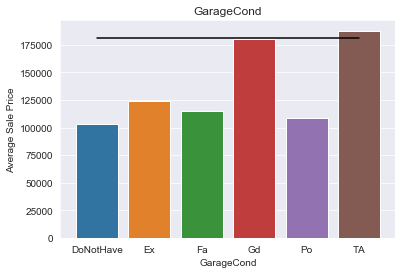

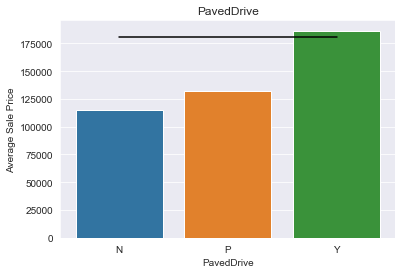

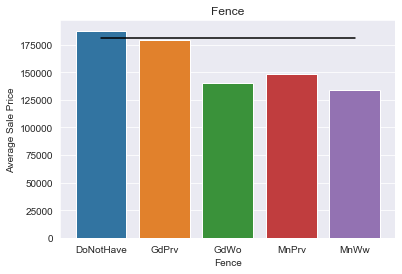

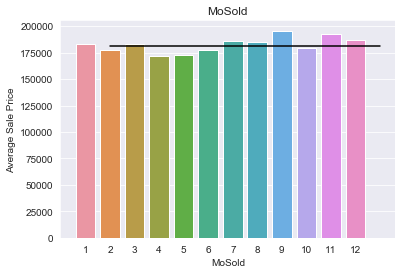

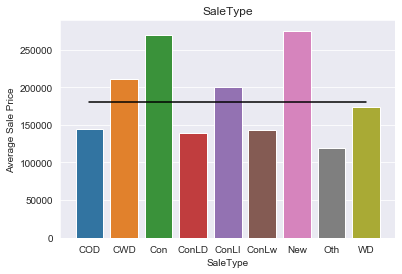

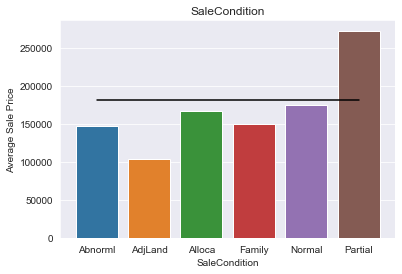

In [544]:
for column in df_all.dtypes[df_all.dtypes == 'object'].index:
    try:
        new= pd.DataFrame(df_all.groupby(column)['SalePrice'].mean()).transpose()
        sns.barplot(data=new, orient='v')
        sns.lineplot(x=new.columns, y=df_all['SalePrice'].mean(), c='k', dashes=True)
    except:
        pass
    else:
        plt.title(column)
        plt.ylabel('Average Sale Price')
        plt.show()

In [545]:
for column in df_all.dtypes[df_all.dtypes == 'object'].index:
    print(f'{len(df_all[column].unique())} Labels for {column}')
    print(df_all[column].unique())
    print('')

5 Labels for MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

2 Labels for Street
['Pave' 'Grvl']

3 Labels for Alley
['DoNotHave' 'Grvl' 'Pave']

4 Labels for LotShape
['Reg' 'IR1' 'IR2' 'IR3']

4 Labels for LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

5 Labels for LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

3 Labels for LandSlope
['Gtl' 'Mod' 'Sev']

25 Labels for Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

9 Labels for Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

8 Labels for Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

5 Labels for BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

8 Labels for HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

6 Labels for RoofStyle
['Gable' 

In [546]:
qual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
qual2 = ['DoNotHave','Po', 'Fa', 'TA', 'Gd', 'Ex']
qual3 = ['Po', 'DoNotHave', 'Fa', 'TA', 'Gd']
qual4 = ['DoNotHave','No', 'Mn', 'Av', 'Gd']
qual5 = ['Po', 'DoNotHave', 'Fa', 'TA', 'Gd', 'Ex']
qual6 = ['N', 'P', 'Y']
qual7 = ['vo', 'o', 'so', 'sn', 'n', 'vn']

In [547]:
oe = OrdinalEncoder(categories=[qual, qual, qual2, qual3, qual4, qual, qual, qual5, qual5, qual6, qual7])

In [548]:
to_oe = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
        'GarageQual', 'PavedDrive', 'GarageBldYr']
to_ohe = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
         'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
          'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',
         'GarageFinish', 'GarageCond', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']

In [549]:
oe.fit(df_all[to_oe])

OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['DoNotHave', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'DoNotHave', 'Fa', 'TA', 'Gd'],
                           ['DoNotHave', 'No', 'Mn', 'Av', 'Gd'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'DoNotHave', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'DoNotHave', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['N', 'P', 'Y'],
                           ['vo', 'o', 'so', 'sn', 'n', 'vn']],
               dtype=<class 'numpy.float64'>)

In [550]:
oe.categories_

[array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['DoNotHave', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'DoNotHave', 'Fa', 'TA', 'Gd'], dtype=object),
 array(['DoNotHave', 'No', 'Mn', 'Av', 'Gd'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'DoNotHave', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'DoNotHave', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['N', 'P', 'Y'], dtype=object),
 array(['vo', 'o', 'so', 'sn', 'n', 'vn'], dtype=object)]

In [551]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_all[to_ohe])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [552]:
ohe.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['DoNotHave', 'Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1St

In [553]:
for i in range(len(data)):
    to_concat1 = pd.DataFrame(oe.transform(data[i][to_oe]), columns=to_oe).add_prefix('OE_')
    to_concat2 = pd.DataFrame(ohe.transform(data[i][to_ohe]))
    to_concat2.columns = ohe.get_feature_names(to_ohe)
    data[i] = pd.concat([data[i], to_concat1, to_concat2], axis=1)
    data[i].drop(columns=to_oe, inplace=True)
    data[i].drop(columns=to_ohe, inplace=True)
    display(data[i].head())
    display(data[i].info())
    display(data[i].shape)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  YrSold  SalePrice  TennisC?  ExcPool?  \
0            0         0        0    2008     208500         0         0   
1            0         0        0    2007     181500         0         0   
2            0         0        0    2008     223500         0         0   
3            0         0        0    2006     140000         0         0   
4            0         0        0    2008     250000         0         0   

   OE_ExterQual  OE_ExterCond  OE_BsmtQual  OE_BsmtCond  OE_BsmtExposure  \
0           3.0           2.0          4.0          3.0              1.0   
1           2.0           2.0          4.0          3.0              4.0   
2           3.0           2.0          4.0          3.0              2.0   
3           2.0           2.0          3.0          4.0              1.0   
4           3.0           2.0          4.0          3.0              3.0   

   OE_HeatingQC  OE_KitchenQual  OE_FireplaceQu  OE_GarageQual  OE_PavedDrive  \
0           4.0             3.0             1.0            3.0            2.0   
1           4.0             2.0             3.0            3.0            2.0   
2           4.0             3.0             3.0            3.0            2.0   
3           3.0             3.0             4.0            3.0            2.0   
4           4.0             3.0             3.0            3.0            2.0   

   OE_GarageBldYr  MSZoning_C (all)  ...  Functional_Typ  GarageType_2Types  \
0             4.0               0.0  ...             1.0                0.0   
1             3.0               0.0  ...             1.0       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 268 entries, Id to SaleCondition_Partial
dtypes: float64(232), int64(36)
memory usage: 3.0 MB


None

(1460, 268)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       1961          1961         0.0         468         144        270   
1       1958          1958       108.0         923           0        406   
2       1997          1998         0.0         791           0        137   
3       1998          1998        20.0         602           0        324   
4       1992          1992         0.0         263           0       1017   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896             0   
1       1329.0      1329         0             0       1329             0   
2        928.0       928       701             0       1629             0   
3        926.0       926       678             0       1604             0   
4       1280.0      1280         0             0       1280             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         1         0             2             1             5   
1             0         1         1             3             1             6   
2             0         2         1             3             1             6   
3             0         2         1             3             1             7   
4             0         2         0             2             1             5   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           1         730         140            0              0   
1           0           1         312         393           36              0   
2           1           2         482         212           34              0   
3           1           2         470         360           36              0   
4           0           2         506           0           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  TennisC?  ExcPool?  \
0          0          120         0        0    2010         0         0   
1          0            0         0    12500    2010         0         0   
2          0            0         0        0    2010         0         0   
3          0            0         0        0    2010         0         0   
4          0          144         0        0    2010         0         0   

   OE_ExterQual  OE_ExterCond  OE_BsmtQual  OE_BsmtCond  OE_BsmtExposure  \
0           2.0           2.0          3.0          3.0              1.0   
1           2.0           2.0          3.0          3.0              1.0   
2           2.0           2.0          4.0          3.0              1.0   
3           2.0           2.0          3.0          3.0              1.0   
4           3.0           2.0          4.0          3.0              1.0   

   OE_HeatingQC  OE_KitchenQual  OE_FireplaceQu  OE_GarageQual  OE_PavedDrive  \
0           2.0             2.0             1.0            3.0            2.0   
1           2.0             3.0             1.0            3.0            2.0   
2           3.0             2.0             3.0            3.0            2.0   
3           4.0             3.0             4.0            3.0            2.0   
4           4.0             3.0             1.0            3.0            2.0   

   OE_GarageBldYr  MSZoning_C (all)  MSZoning_FV  ...  Functional_Typ  \
0             2.0               0.0          0.0  ...             1.0   
1             2.0               0.0          0.0  ...             1.0   
2             4.0               0.0          0.0  ...     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 267 entries, Id to SaleCondition_Partial
dtypes: float64(233), int64(34)
memory usage: 3.0 MB


None

(1459, 267)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150        856.0   
1          1976         0.0         978           0        284       1262.0   
2          2002       162.0         486           0        434        920.0   
3          1970         0.0         216           0        540        756.0   
4          2000       350.0         655           0        490       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  YrSold  SalePrice  TennisC?  ExcPool?  \
0            0         0        0    2008   208500.0         0         0   
1            0         0        0    2007   181500.0         0         0   
2            0         0        0    2008   223500.0         0         0   
3            0         0        0    2006   140000.0         0         0   
4            0         0        0    2008   250000.0         0         0   

   OE_ExterQual  OE_ExterCond  OE_BsmtQual  OE_BsmtCond  OE_BsmtExposure  \
0           3.0           2.0          4.0          3.0              1.0   
1           2.0           2.0          4.0          3.0              4.0   
2           3.0           2.0          4.0          3.0              2.0   
3           2.0           2.0          3.0          4.0              1.0   
4           3.0           2.0          4.0          3.0              3.0   

   OE_HeatingQC  OE_KitchenQual  OE_FireplaceQu  OE_GarageQual  OE_PavedDrive  \
0           4.0             3.0             1.0            3.0            2.0   
1           4.0             2.0             3.0            3.0            2.0   
2           4.0             3.0             3.0            3.0            2.0   
3           3.0             3.0             4.0            3.0            2.0   
4           4.0             3.0             3.0            3.0            2.0   

   OE_GarageBldYr  MSZoning_C (all)  ...  Functional_Typ  GarageType_2Types  \
0             4.0               0.0  ...             1.0                0.0   
1             3.0               0.0  ...             1.0       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 268 entries, Id to SaleCondition_Partial
dtypes: float64(234), int64(34)
memory usage: 6.0 MB


None

(2919, 268)

In [554]:
df_train = data[0]
df_test = data[1]
df_all = data[2]

In [555]:
df_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 268 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Id                      int64  
 1   MSSubClass              int64  
 2   LotFrontage             float64
 3   LotArea                 int64  
 4   OverallQual             int64  
 5   OverallCond             int64  
 6   YearBuilt               int64  
 7   YearRemodAdd            int64  
 8   MasVnrArea              float64
 9   BsmtFinSF1              int64  
 10  BsmtFinSF2              int64  
 11  BsmtUnfSF               int64  
 12  TotalBsmtSF             float64
 13  1stFlrSF                int64  
 14  2ndFlrSF                int64  
 15  LowQualFinSF            int64  
 16  GrLivArea               int64  
 17  BsmtFullBath            int64  
 18  BsmtHalfBath            int64  
 19  FullBath                int64  
 20  HalfBath                int64  
 21  BedroomAbvGr            int64  
 22 

In [556]:
mean_corr = pd.DataFrame(df_train.corr().mean(), columns=['Mean Correlation'])
display(mean_corr.nlargest(10,'Mean Correlation'))
display(mean_corr.nsmallest(10,'Mean Correlation'))

Mean Correlation
GrLivArea             0.054169
SalePrice             0.050604
OverallQual           0.044410
1stFlrSF              0.043087
TotRmsAbvGrd          0.042070
GarageArea            0.039266
GarageCars            0.038810
FullBath              0.038776
TotalBsmtSF           0.038569
OE_ExterQual          0.036678

Mean Correlation
RoofMatl_CompShg             -0.022475
GarageFinish_Unf             -0.022082
MasVnrType_None              -0.020134
GarageType_Detchd            -0.019074
LotShape_Reg                 -0.017930
Foundation_CBlock            -0.017059
RoofStyle_Gable              -0.016094
SaleType_WD                  -0.015372
SaleCondition_Normal         -0.014003
HouseStyle_1Story            -0.013657

In [557]:
price_corr = pd.DataFrame(df_train.corr()['SalePrice'])
price_corr.rename(columns={'SalePrice' : 'Corr w/ SalePrice'}, inplace=True)
price_corr
display(price_corr.nlargest(20,'Corr w/ SalePrice'))
display(price_corr.nsmallest(20,'Corr w/ SalePrice'))

Corr w/ SalePrice
SalePrice                  1.000000
OverallQual                0.790982
GrLivArea                  0.708624
OE_ExterQual               0.682639
OE_KitchenQual             0.659600
GarageCars                 0.640409
GarageArea                 0.623431
TotalBsmtSF                0.613581
1stFlrSF                   0.605852
OE_BsmtQual                0.585207
FullBath                   0.560664
OE_GarageBldYr             0.557105
TotRmsAbvGrd               0.533723
OE_FireplaceQu             0.525932
YearBuilt                  0.522897
YearRemodAdd               0.507101
Foundation_PConc           0.497734
MasVnrArea                 0.477929
Fireplaces                 0.466929
BsmtFinType1_GLQ           0.434597

Corr w/ SalePrice
GarageFinish_Unf                -0.410608
MasVnrType_None                 -0.373233
GarageType_Detchd               -0.354141
Foundation_CBlock               -0.343263
MSZoning_RM                     -0.288065
LotShape_Reg                    -0.267672
CentralAir_N                    -0.251328
SaleType_WD                     -0.242598
GarageType_DoNotHave            -0.236832
GarageFinish_DoNotHave          -0.236832
GarageCond_DoNotHave            -0.236832
RoofStyle_Gable                 -0.224744
Foundation_BrkTil               -0.204117
Electrical_FuseA                -0.193978
Neighborhood_OldTown            -0.192189
Neighborhood_NAmes              -0.188513
Neighborhood_Edwards            -0.179949
Exterior1st_MetalSd             -0.167068
Neighborhood_IDOTRR             -0.164056
HouseStyle_1.5Fin               -0.163466

In [558]:
X_train = df_train.drop('SalePrice', axis=1).values
y_train = df_train['SalePrice'].values
X_test = df_test.values

In [559]:
scaler = StandardScaler()

In [560]:
scaler.fit(df_all.drop('SalePrice', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [567]:
scaler.transform(X_train).shape

(1460, 267)

In [568]:
scaler.transform(X_test).shape

(1459, 267)

In [569]:
scaler.transform(df_all.drop('SalePrice', axis=1)).shape

(2919, 267)

In [564]:
X_train.shape

(1460, 267)

In [565]:
X_test.shape

(1459, 267)

In [566]:
df_all.drop('SalePrice', axis=1).values.shape

(2919, 267)

In [580]:
cross_val_score(Ridge(), X_train, y_train.reshape(-1,1), cv=5, scoring='neg_mean_squared_error').mean()*-1

1166864304.7145839

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 129900,
       154000, 256300, 134800, 306000, 207500,  68500,  40000, 149350,
       179900, 165500, 277500, 309000, 145000, 153000, 109000,  82000,
       160000, 170000, 144000, 130250, 141000, 319900, 239686, 249700,
       113000, 127000, 177000, 114500, 110000, 385000, 130000, 180500,
       172500, 196500, 438780, 124900, 158000, 101000, 202500, 140000,
       219500, 317000, 180000, 226000,  80000, 225000, 244000, 129500,
       185000, 144900, 107400,  91000, 135750, 127000, 136500, 110000,
       193500, 153500, 245000, 126500, 168500, 260000, 174000, 164500,
        85000, 123600, 109900,  98600, 163500, 133900, 204750, 185000,
       214000,  94750,  83000, 128950, 205000, 178000, 118964, 198900,
       169500, 250000, 100000, 115000, 115000, 190000, 136900, 180000,
      

### Pre-processing - Feature

### Model Building

### Hyperparameter Tuning